In [ ]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import missingno as msno
import seaborn as sns
from matplotlib import rc
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'NanumGothic'
rc('font', weight='bold')
%matplotlib inline

In [ ]:
# 요일별 상품별 취급액?

### 결측치
- 노출(분), 취급액에 존재
- 노출의 결측치 : 동일상품 및 동일시간 다른 옵션에 해당하는 데이터
- 취급액의 결측치 : 무형 및 보험상품
- __결측치 처리 필요X__

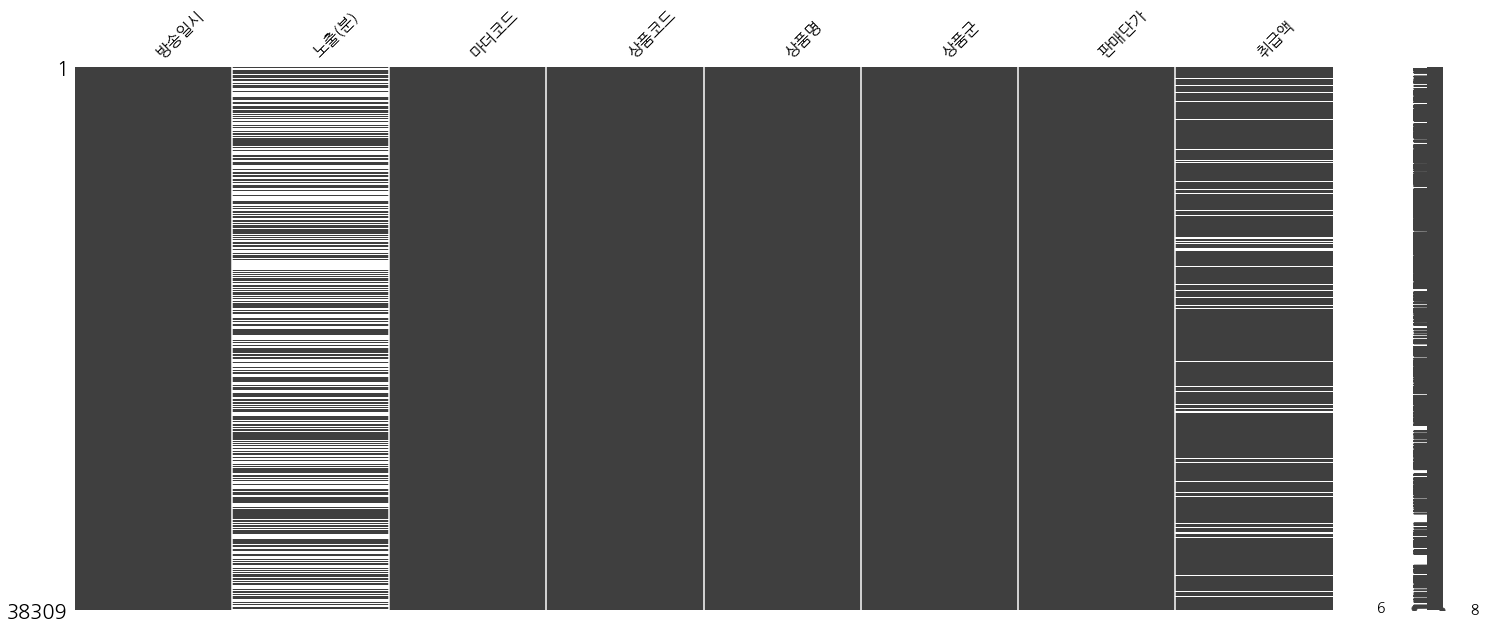

In [ ]:
sales_train = pd.read_excel('train/sales_train.xlsx', skiprows=1)
msno.matrix(sales_train)

In [ ]:
sales_train = pd.read_excel('train/sales_train.xlsx', skiprows=1)

t = ['mon', 'tue', 'wed', 'thur', 'fri', 'sat', 'sun'] # 요일
hday = [i.replace(' ','-') for i in [
'2019 01 01',
'2019 02 04',
'2019 02 05',
'2019 02 06',
'2019 03 01',
'2019 05 06',
'2019 06 06',
'2019 08 15',
'2019 09 12',
'2019 08 13',
'2019 10 03',
'2019 10 09',
'2019 12 25',
'2020 01 01',]]

sales_train.columns = ['datetime', 'duration', 'mthcode', 'pdcode', 'pdname', 'pdgroup','unitp', 'sales']
sales_train['datetime'] = pd.to_datetime(sales_train['datetime'])
sales_train['mth'] = sales_train['datetime'].dt.month
sales_train['day'] = sales_train['datetime'].dt.day
sales_train['hour'] = sales_train['datetime'].dt.hour
sales_train.loc[sales_train['hour']==0, 'hour'] = 24 # 00h -> 24h
sales_train['minute'] = sales_train['datetime'].dt.minute
sales_train['date'] = sales_train['datetime'].apply(lambda x: str(x).split()[0])
sales_train['wday'] = sales_train['datetime'].apply(lambda x: t[x.weekday()])
sales_train['hday'] = sales_train['wday'].apply(lambda x: 0)
sales_train.loc[(sales_train['date'].isin(hday)) | (sales_train['wday'].isin(['sat', 'sun'])), 'hday'] = 1
sales_train['date_pk'] = sales_train['date'].apply(lambda x: x[-5:])
sales_train['date_pk'] = sales_train['date_pk'] + ' '+ sales_train['wday']
sales_train['pd_pk'] = sales_train['pdgroup'].astype('str') + sales_train['mthcode'].astype('str')
sales_train.head()

datetime  duration  mthcode  pdcode         pdname pdgroup  \
0 2019-01-01 06:00:00      20.0   100346  201072  테이트 남성 셀린니트3종      의류   
1 2019-01-01 06:00:00       NaN   100346  201079  테이트 여성 셀린니트3종      의류   
2 2019-01-01 06:20:00      20.0   100346  201072  테이트 남성 셀린니트3종      의류   
3 2019-01-01 06:20:00       NaN   100346  201079  테이트 여성 셀린니트3종      의류   
4 2019-01-01 06:40:00      20.0   100346  201072  테이트 남성 셀린니트3종      의류   

   unitp      sales  mth  day  hour  minute        date wday  hday    date_pk  \
0  39900  2099000.0    1    1     6       0  2019-01-01  tue     1  01-01 tue   
1  39900  4371000.0    1    1     6       0  2019-01-01  tue     1  01-01 tue   
2  39900  3262000.0    1    1     6      20  2019-01-01  tue     1  01-01 tue   
3  39900  6955000.0    1    1     6      20  2019-01-01  tue     1  01-01 tue   
4  39900  6672000.0    1    1     6      40  2019-01-01  tue     1  01-01 tue   

      pd_pk  
0  의류100346  
1  의류100346  
2  의류100346  
3  의류100346  
4  의류100346

*********************************평일 상품군 편성시간대 month = 1 *********************************


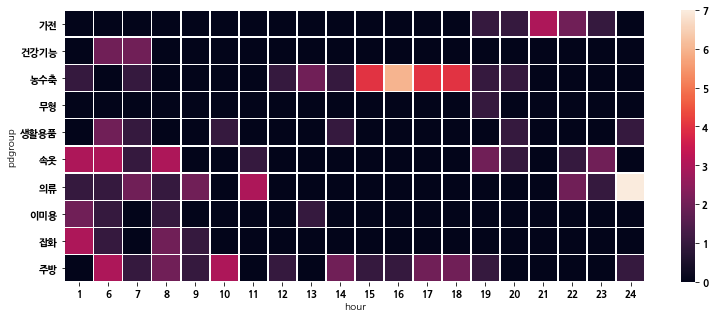

*********************************평일 상품군 편성시간대 month = 2 *********************************


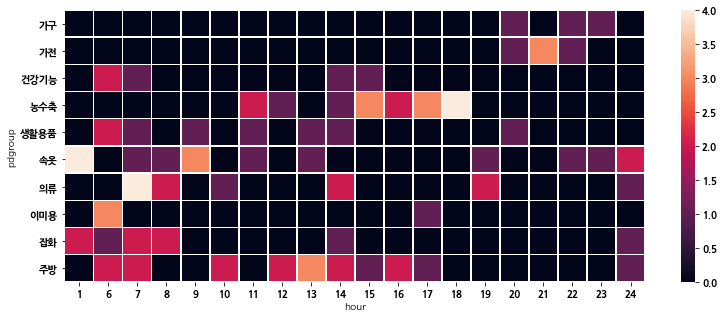

*********************************평일 상품군 편성시간대 month = 3 *********************************


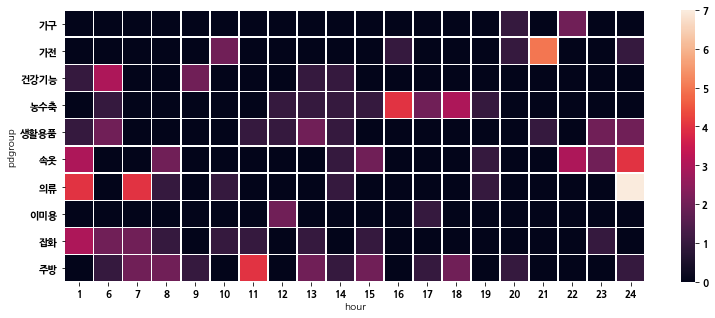

*********************************평일 상품군 편성시간대 month = 4 *********************************


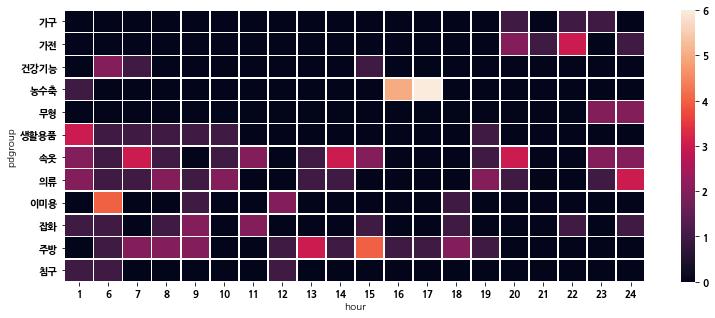

*********************************평일 상품군 편성시간대 month = 5 *********************************


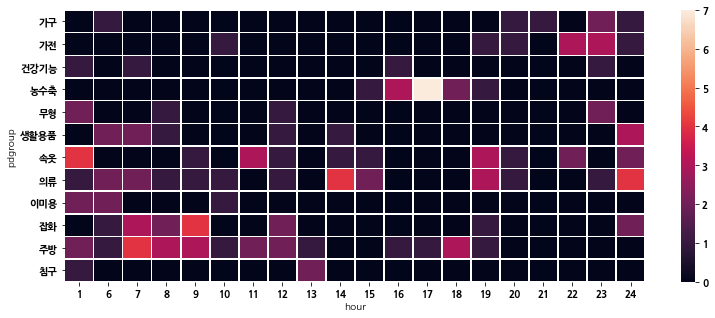

*********************************평일 상품군 편성시간대 month = 6 *********************************


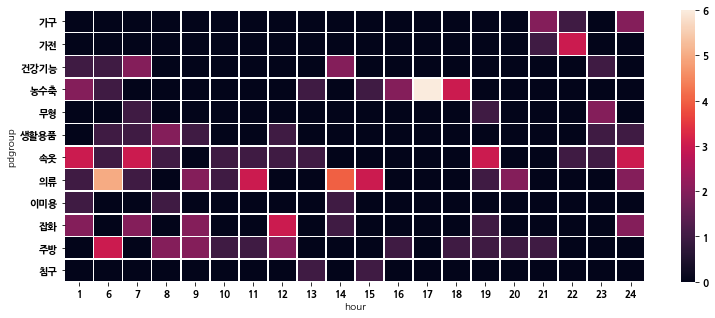

*********************************평일 상품군 편성시간대 month = 7 *********************************


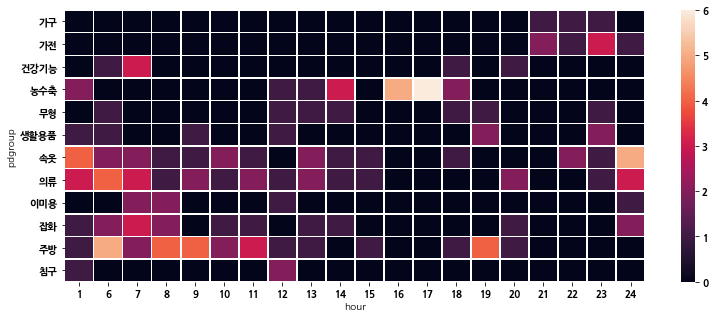

*********************************평일 상품군 편성시간대 month = 8 *********************************


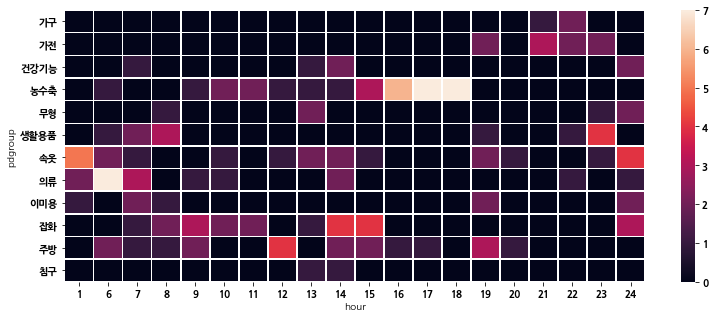

*********************************평일 상품군 편성시간대 month = 9 *********************************


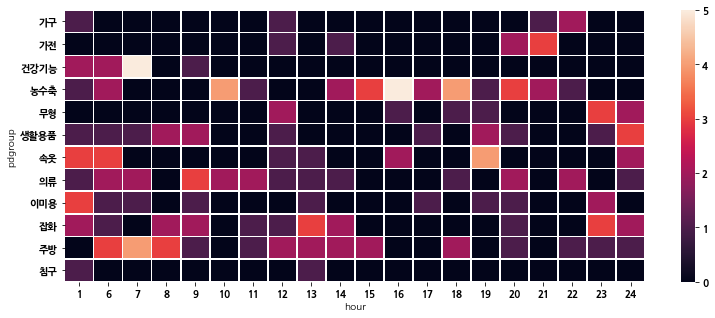

*********************************평일 상품군 편성시간대 month = 10 *********************************


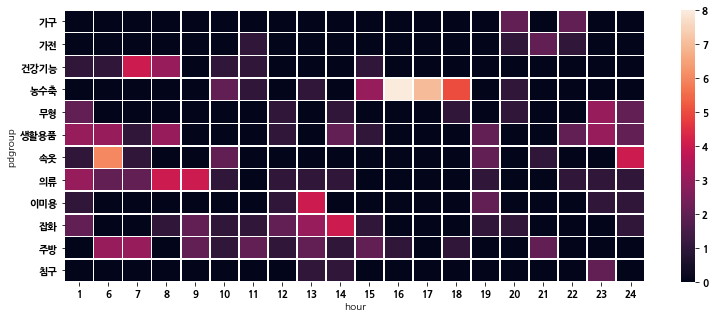

*********************************평일 상품군 편성시간대 month = 11 *********************************


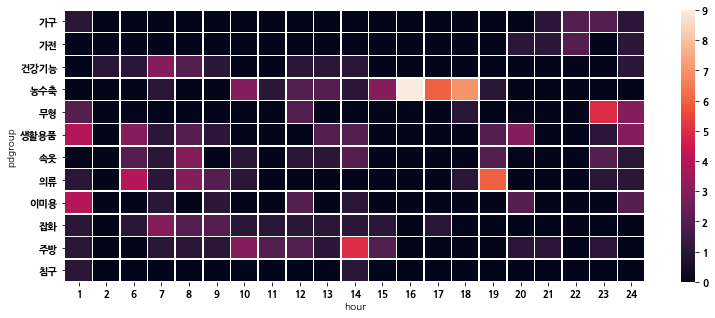

*********************************평일 상품군 편성시간대 month = 12 *********************************


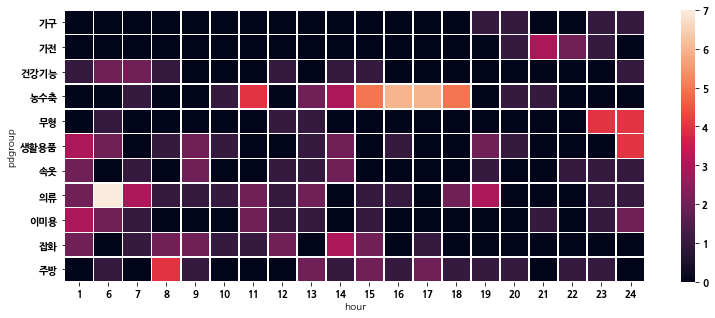

*********************************휴일 상품군 편성시간대 month = 1 *********************************


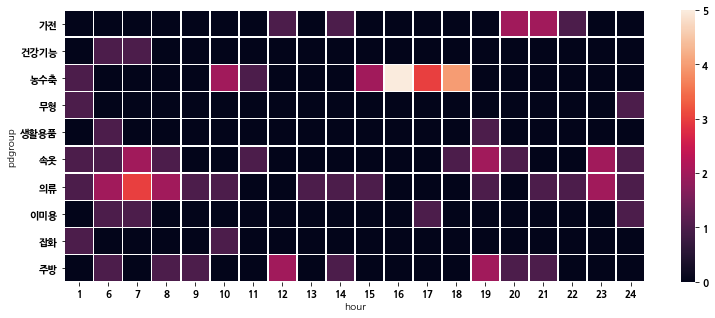

*********************************휴일 상품군 편성시간대 month = 2 *********************************


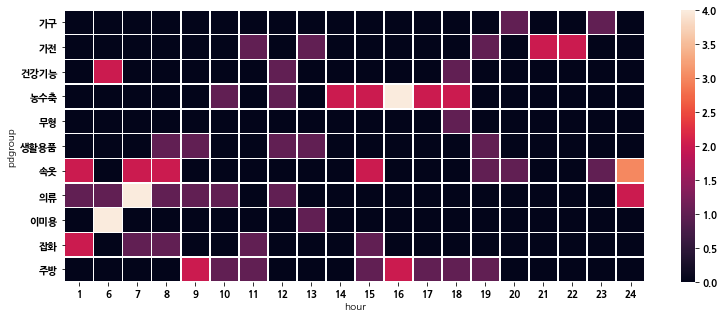

*********************************휴일 상품군 편성시간대 month = 3 *********************************


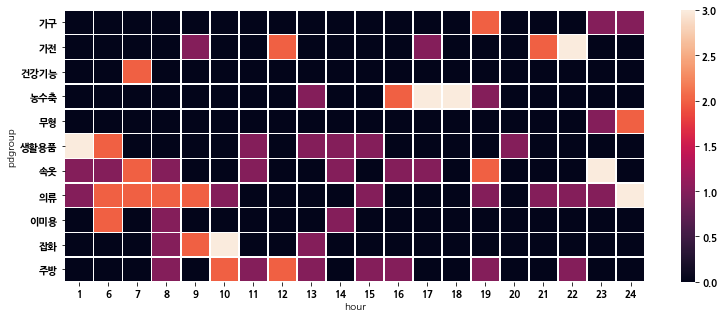

*********************************휴일 상품군 편성시간대 month = 4 *********************************


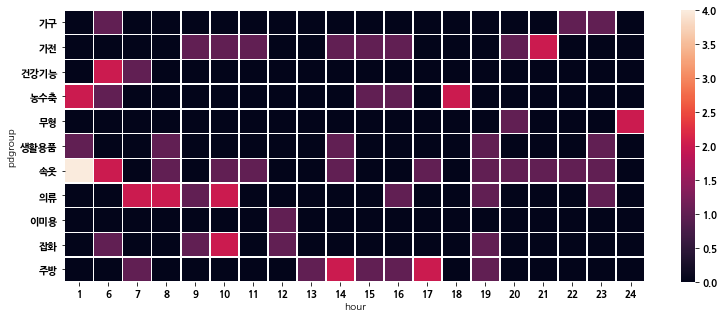

*********************************휴일 상품군 편성시간대 month = 5 *********************************


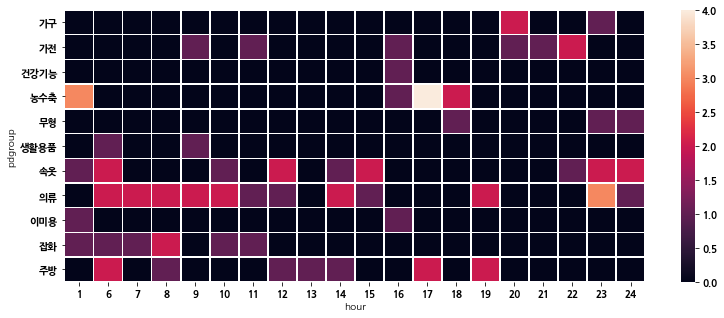

*********************************휴일 상품군 편성시간대 month = 6 *********************************


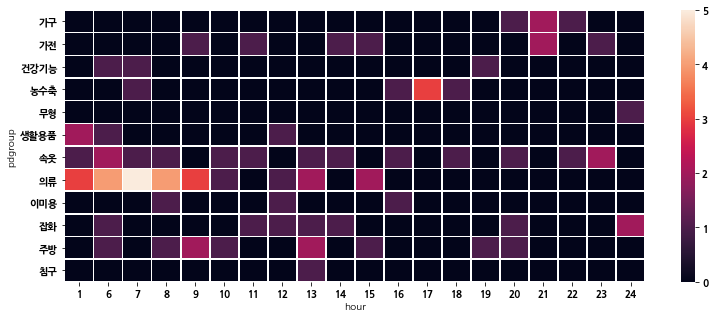

*********************************휴일 상품군 편성시간대 month = 7 *********************************


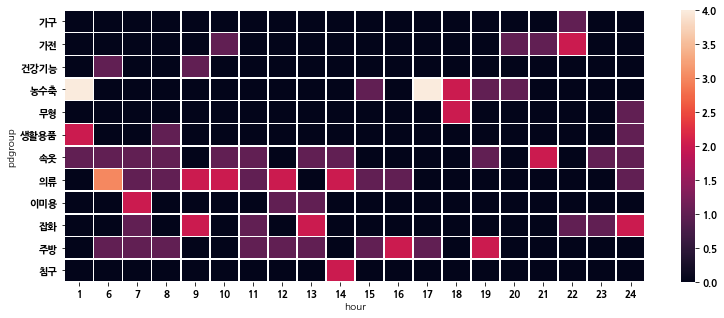

*********************************휴일 상품군 편성시간대 month = 8 *********************************


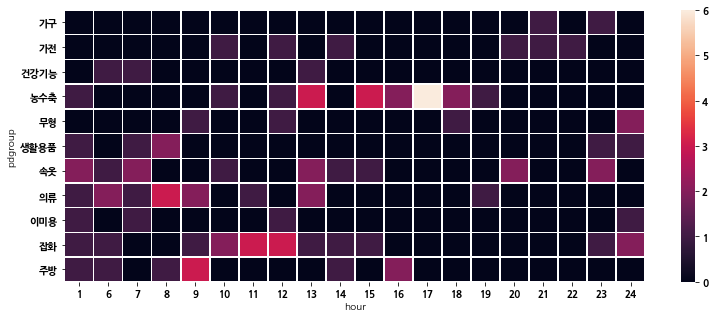

*********************************휴일 상품군 편성시간대 month = 9 *********************************


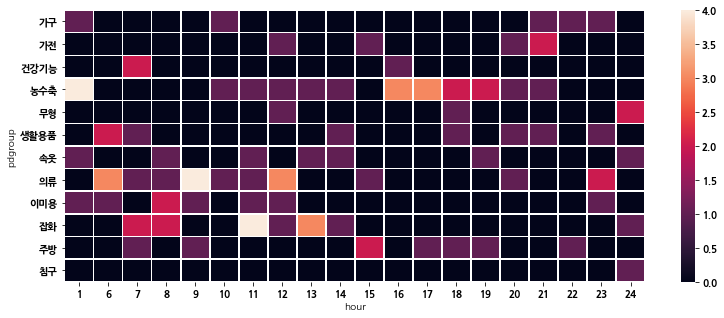

*********************************휴일 상품군 편성시간대 month = 10 *********************************


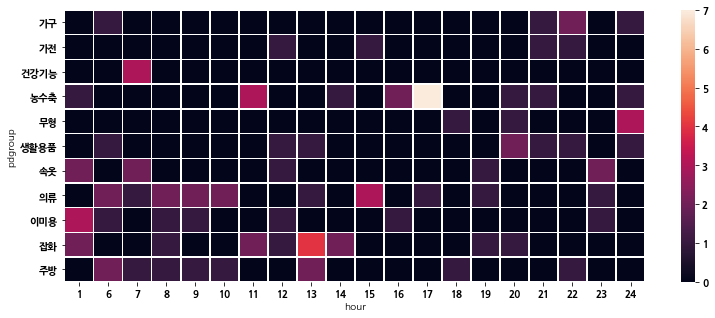

*********************************휴일 상품군 편성시간대 month = 11 *********************************


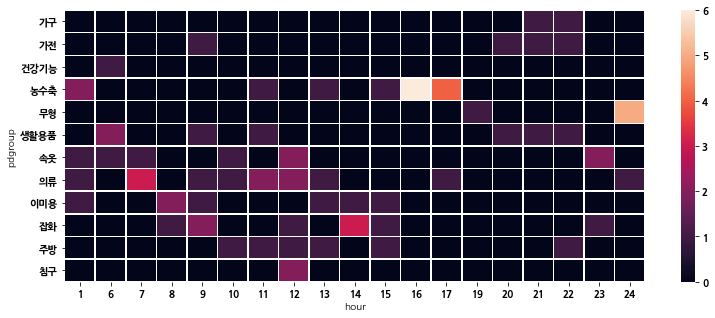

*********************************휴일 상품군 편성시간대 month = 12 *********************************


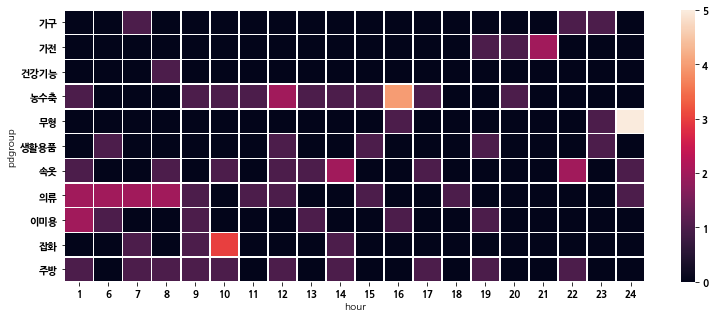

In [ ]:
# 평일,휴일 상품군별 편성 시간대 (월별)
for h in range(2):
    hday = h
    for mth in range(1,13):
        if h==0:
            print('*********************************평일 상품군 편성시간대 month = {} *********************************'.format(mth))
            path = 'viz/평일,휴일 상품군별 편성 시간대 (월별)/평일 {}월 상품군별 편성시간.png'.format(mth)
        else:
            print('*********************************휴일 상품군 편성시간대 month = {} *********************************'.format(mth))
            path = 'viz/평일,휴일 상품군별 편성 시간대 (월별)/휴일 {}월 상품군별 편성시간.png'.format(mth)
        df = sales_train[(sales_train['mth']==mth) & (sales_train['hday']==hday)].drop_duplicates(subset='pd_pk', keep='first').pivot_table(values = 'pd_pk', index = 'pdgroup', columns = 'hour', aggfunc= 'count').fillna(0)
        plt.figure(figsize=(13,5))
        sns.heatmap(df, linewidth=0.5)
        #plt.savefig(path, dpi = 500)
        plt.show()

In [ ]:
# 프라임시간 상품군별 프로그램 편성개수
prime_morning = [8, 9, 10, 11]
prime_aftnoon = [18, 19, 20, 21, 22, 23]
prime_evening = [16, 17]
primes = [prime_morning, prime_aftnoon, prime_evening]
cmaps = ['yellow', 'orange', 'blue']
for p, c in zip(primes, cmaps):
    p_cnt = sales_train[sales_train['hour'].isin(p)].drop_duplicates(subset = ['pd_pk'], keep = 'first').pivot_table(values = 'pd_pk', columns = ['mth'], index =['pdgroup'], aggfunc = 'count') # date_pk
    p_cnt = p_cnt.fillna(0)
    #p_cnt.plot(kind=)
    print('************************* prime time {} ~ {} *************************'.format(p[0], p[-1]))
    cm = sns.light_palette(c, as_cmap=True)
    display(p_cnt.style.background_gradient(cmap=cm))
    pp_ = p_cnt/p_cnt.sum()
    print('************************* prime time {} ~ {} *************************'.format(p[0], p[-1]))
    display(pp_.style.background_gradient(cmap=cm).format('{:.2%}'))

************************* prime time 8 ~ 11 *************************


************************* prime time 8 ~ 11 *************************


************************* prime time 18 ~ 23 *************************


************************* prime time 18 ~ 23 *************************


************************* prime time 16 ~ 17 *************************


************************* prime time 16 ~ 17 *************************


In [ ]:
# 프라임시간 오전, 오후 8 ~ 11 상품군별 매출액
prime_morning = [8, 9, 10, 11]
prime_evening = [18, 19, 20, 21, 22, 23]
prime_aftnoon = [16, 17]
primes = [prime_morning, prime_evening, prime_aftnoon]
cmaps = ['yellow', 'orange', 'blue']
for p, c in zip(primes, cmaps):
    p_sales = sales_train[sales_train['hour'].isin(p)].pivot_table(values = 'sales', columns = ['mth'], index =['pdgroup'], aggfunc = 'sum') # date_pk
    p_sales = p_sales.fillna(0)
    #p_cnt.plot(kind=)
    print('************************* prime time {} ~ {} *************************'.format(p[0], p[-1]))
    cm = sns.light_palette(c, as_cmap=True)
    display(p_sales.style.background_gradient(cmap=cm).format('{:.0f}'))
    pp_ = p_sales/p_sales.sum()
    print('************************* prime time {} ~ {} *************************'.format(p[0], p[-1]))
    display(pp_.style.background_gradient(cmap=cm).format('{:.2%}'))

************************* prime time 8 ~ 11 *************************


************************* prime time 8 ~ 11 *************************


************************* prime time 18 ~ 23 *************************


************************* prime time 18 ~ 23 *************************


************************* prime time 16 ~ 17 *************************


************************* prime time 16 ~ 17 *************************


In [ ]:
# 프라임시간 오전, 오후 8 ~ 11 상품군별과 프로그램 편성개수와 매출액 상관관계

prime_morning = [8, 9, 10, 11]
prime_evening = [18, 19, 20, 21, 22, 23]
prime_aftnoon = [16, 17]
primes = [prime_morning, prime_evening, prime_aftnoon]
cmaps = ['yellow', 'orange', 'blue']

def color_yell(row):
    is_max = row >= 0.6
    return ['background-color: yellow' if v else '' for v in is_max]


for p, c in zip(primes, cmaps):
    p_cnt = sales_train[sales_train['hour'].isin(p)].drop_duplicates(subset = ['pd_pk'], keep = 'first').pivot_table(values = 'pd_pk', columns = ['mth'], index =['pdgroup'], aggfunc = 'count') # date_pk
    p_cnt = p_cnt.fillna(0)
    
    p_sales = sales_train[sales_train['hour'].isin(p)].pivot_table(values = 'sales', columns = ['mth'], index =['pdgroup'], aggfunc = 'sum') # date_pk
    p_sales = p_sales.fillna(0)
    #p_cnt.plot(kind=)
    print('************************* prime time {} ~ {} *************************'.format(p[0], p[-1]))
    cm = sns.light_palette(c, as_cmap=True)
    display(pd.DataFrame(p_cnt.T.corrwith(p_sales.T),columns=['corr']).T.style.apply(color_yell, axis=0).format('{:.2f}'))

************************* prime time 8 ~ 11 *************************


************************* prime time 18 ~ 23 *************************


************************* prime time 16 ~ 17 *************************


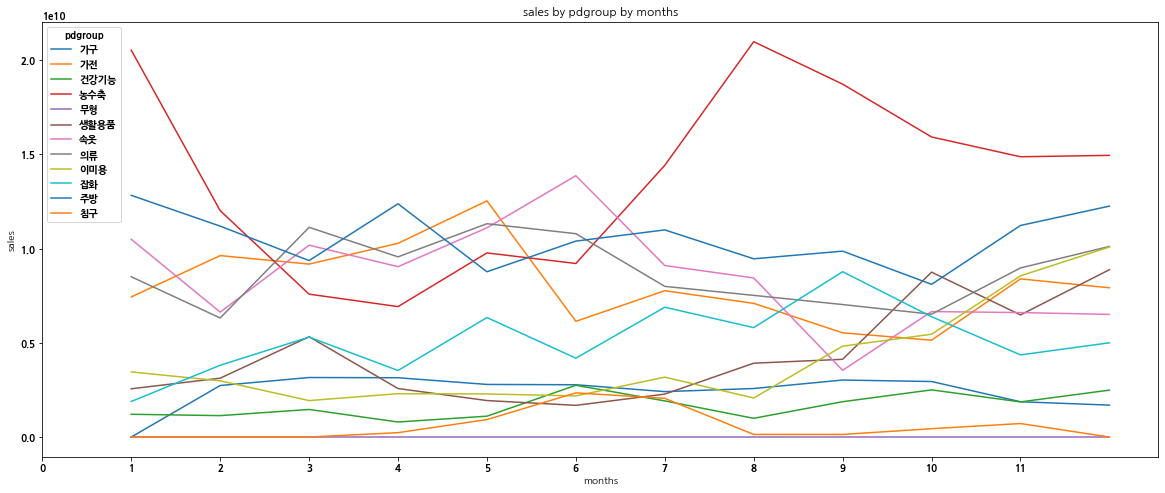

In [ ]:
# 월별 상품군 매출
p_sales = sales_train.pivot_table(values = 'sales', columns = ['mth'], index =['pdgroup'], aggfunc = 'sum') # date_pk
p_sales = p_sales.fillna(0)
ax = p_sales.T.plot(kind = 'line', figsize = (20, 8))
#ax.legend(loc='upper left')
ax.set_xticks(range(len(p_sales.T)))
# ax.set_xticklabels([idx for idx in p_sales.T.index.tolist()], rotation=70)
plt.xlabel('months')
plt.ylabel('sales')
plt.title('sales by pdgroup by months')
#plt.savefig('viz/월별 상품군별 sales/2019.png', dpi = 400)
plt.show()

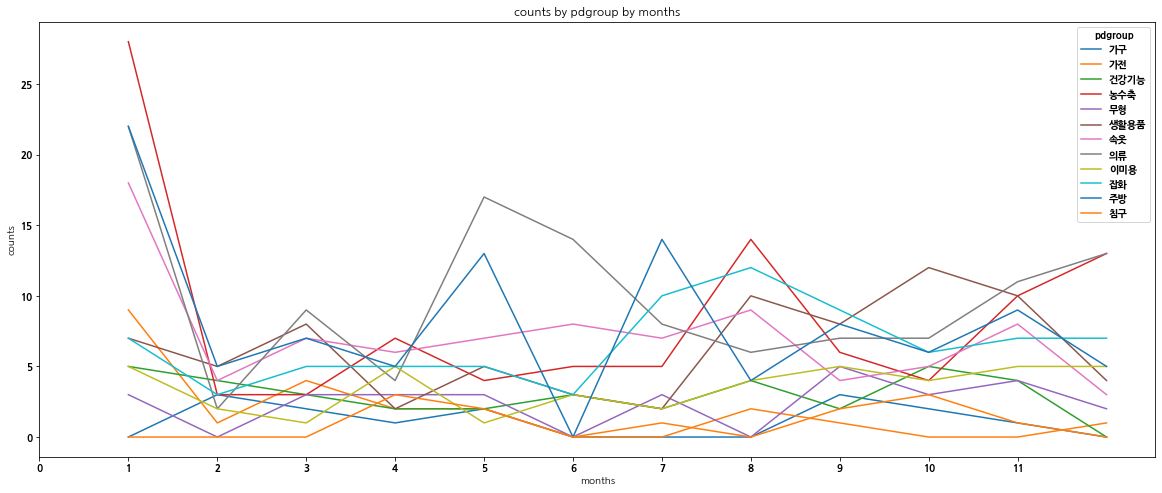

In [ ]:
# 월별 상품군 편성개수 : 프로그램 개수 (mthcode + pdgroup)
p_sales = sales_train.drop_duplicates(subset = ['pd_pk'], keep = 'first').pivot_table(values = 'pd_pk', columns = ['mth'], index =['pdgroup'], aggfunc = 'count') # date_pk
p_sales = p_sales.fillna(0)
ax = p_sales.T.plot(kind = 'line', figsize = (20, 8))
#ax.legend(loc='upper left')
ax.set_xticks(range(len(p_sales.T)))
# ax.set_xticklabels([idx for idx in p_sales.T.index.tolist()], rotation=70)
plt.xlabel('months')
plt.ylabel('counts')
plt.title('counts by pdgroup by months')
plt.savefig('viz/월별 상품군별 count/2019.png', dpi = 400)
plt.show()

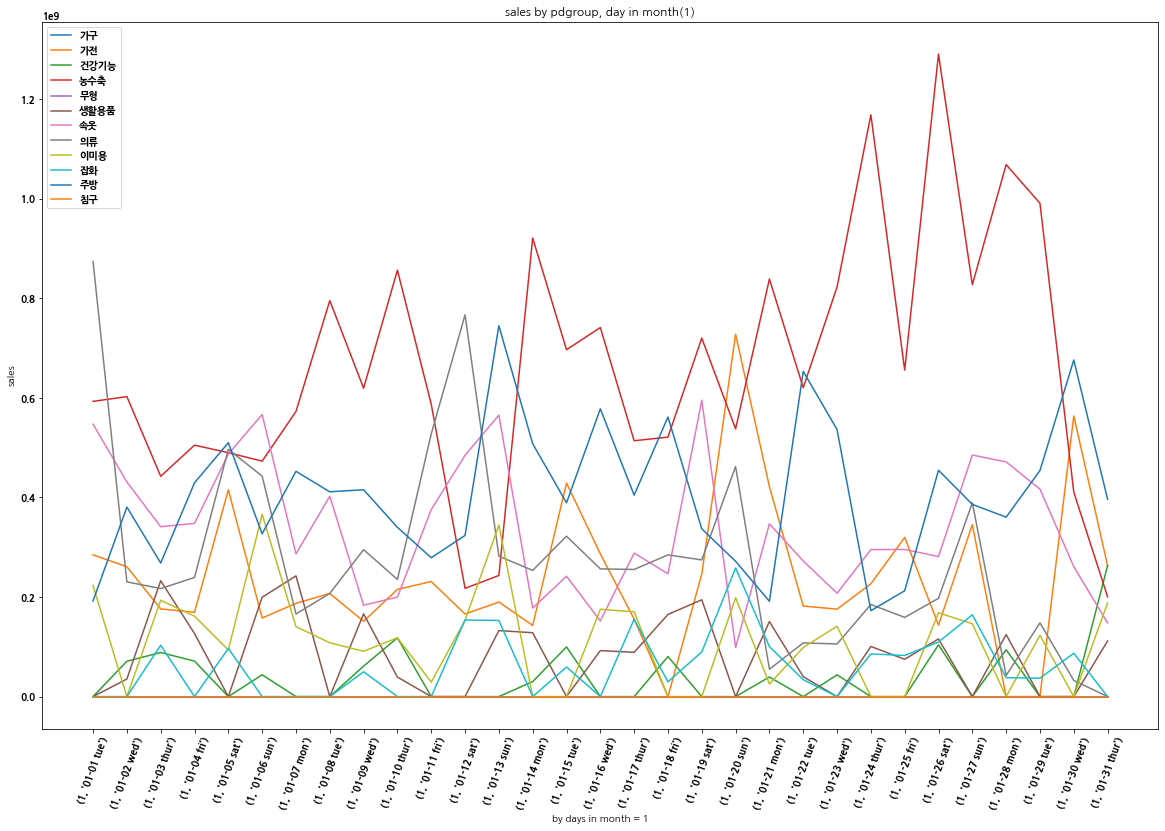

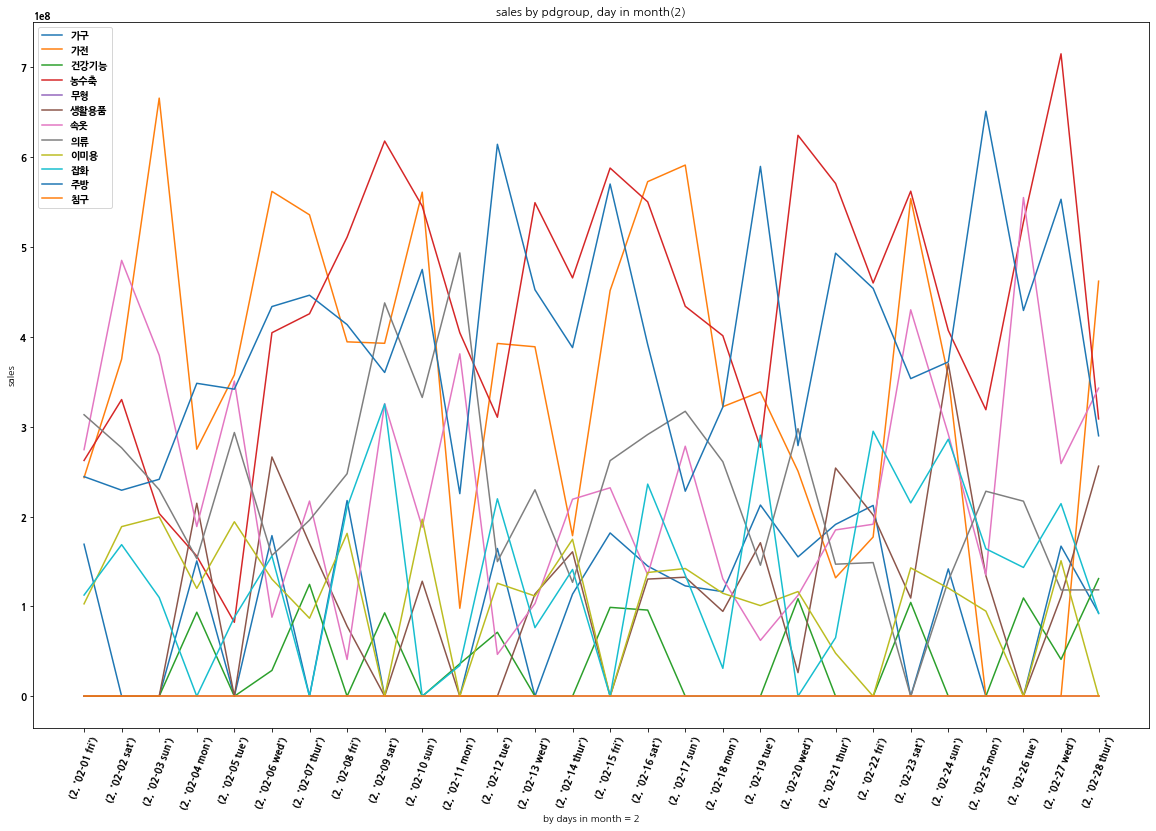

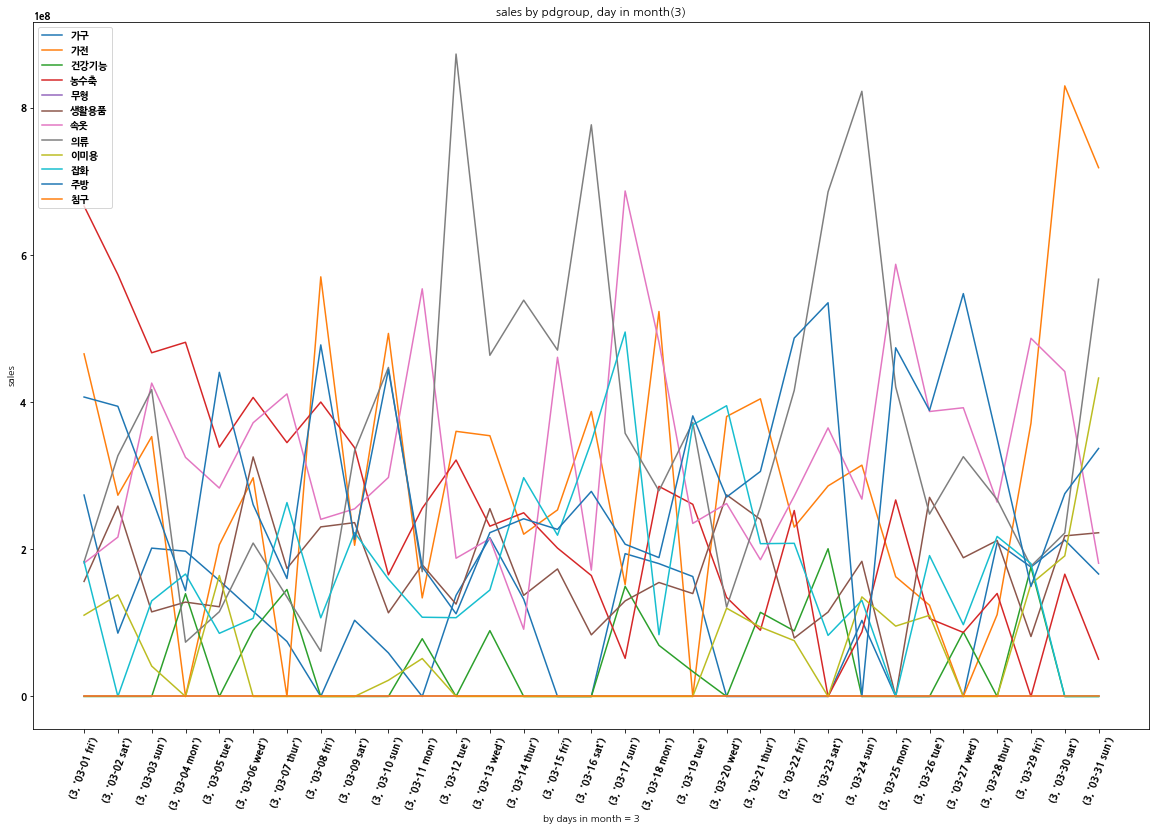

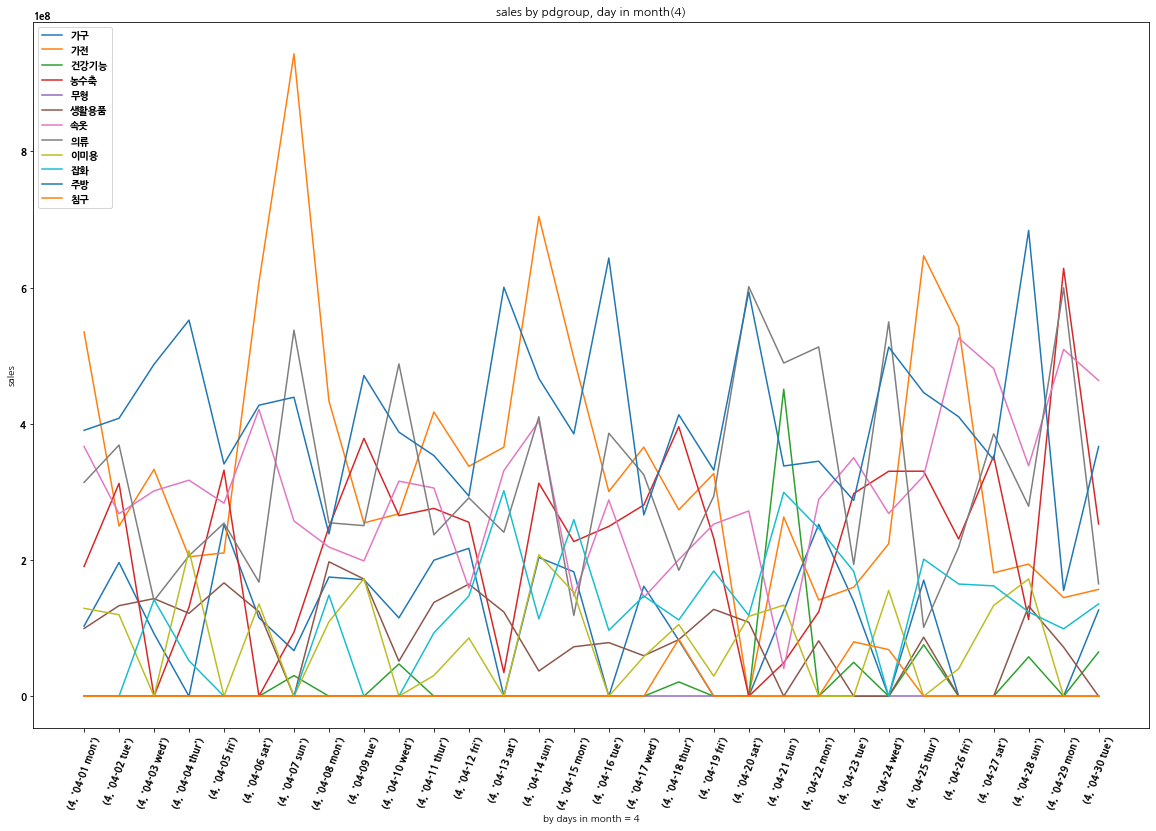

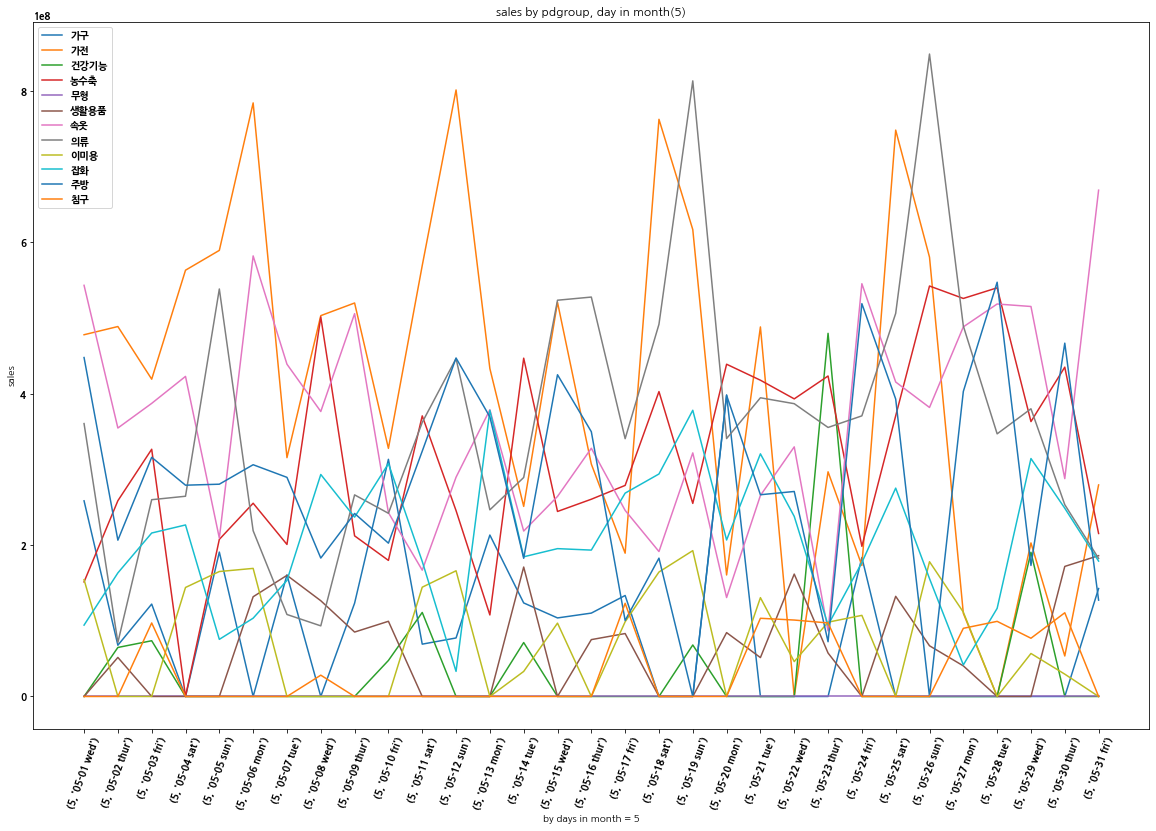

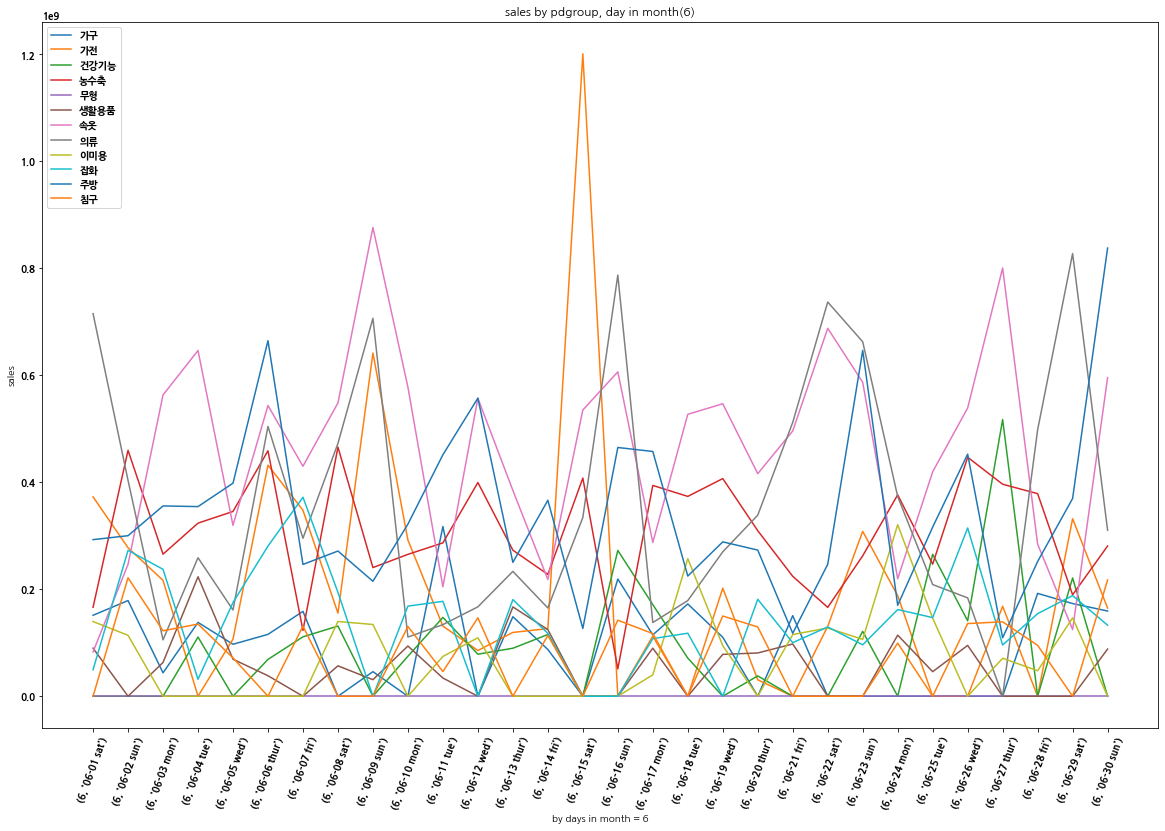

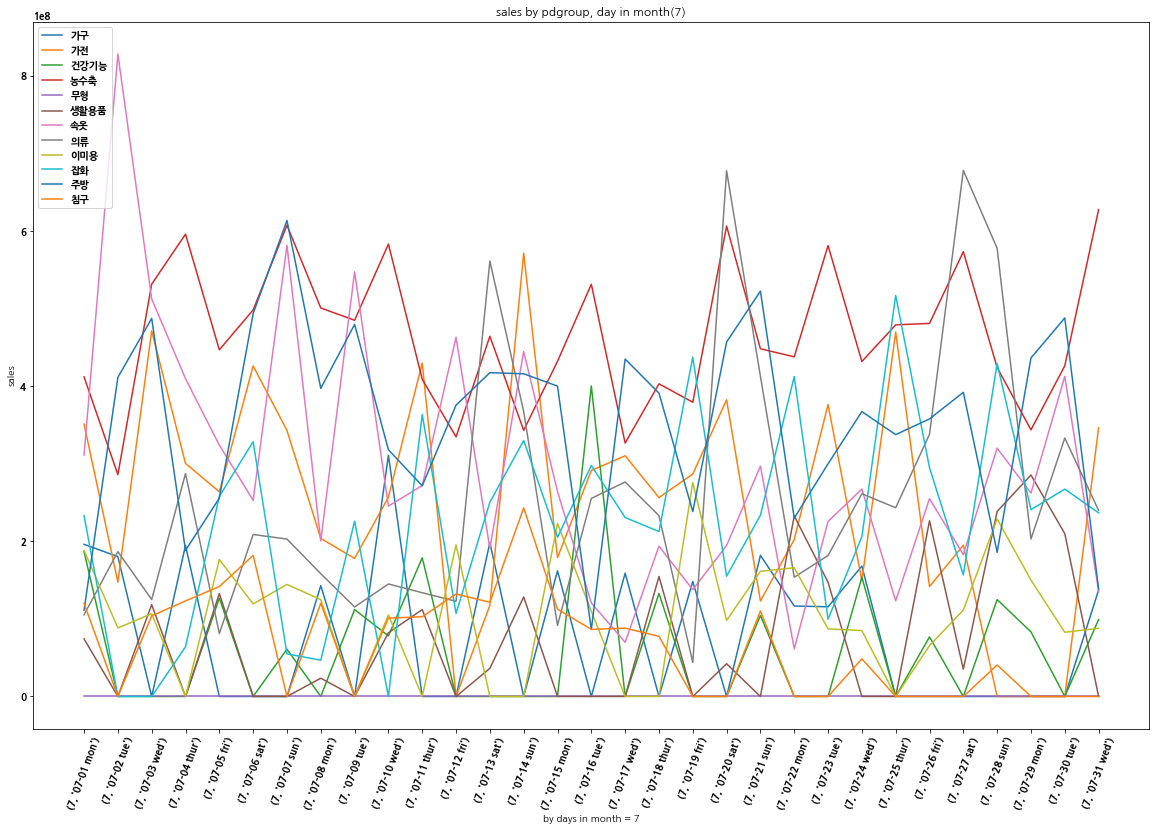

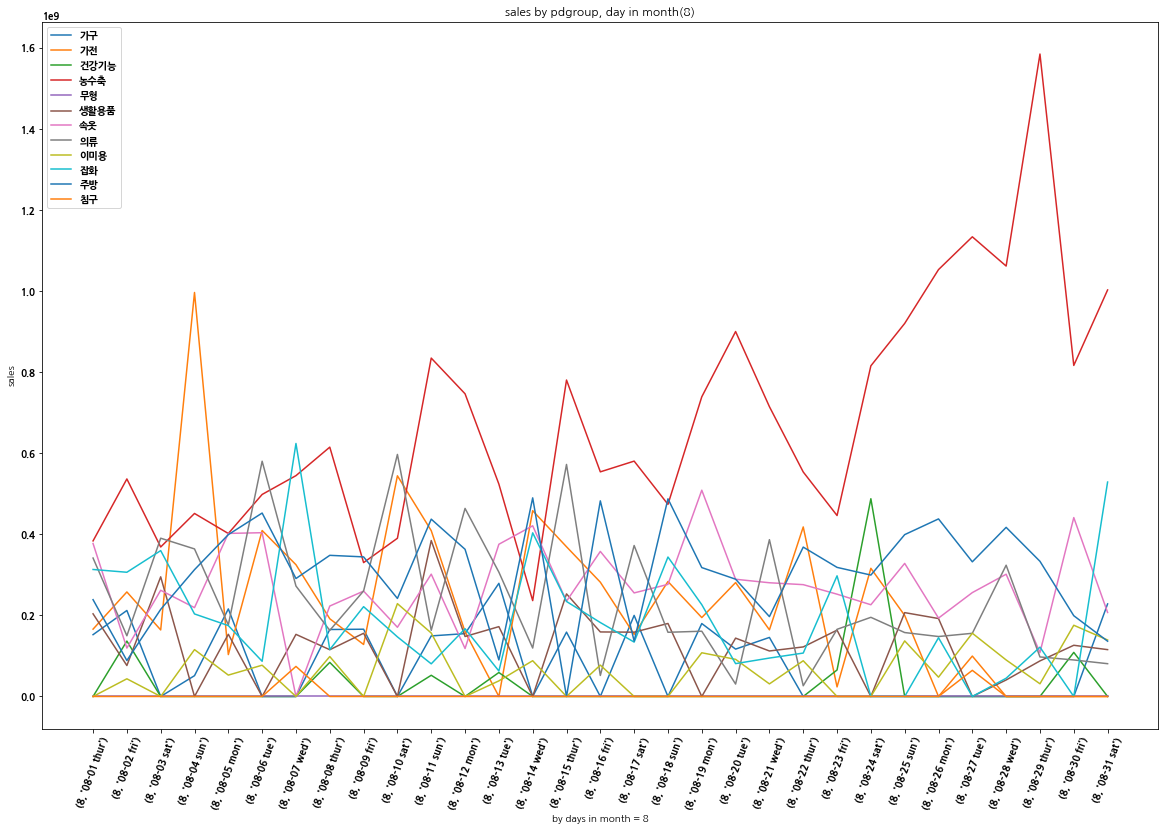

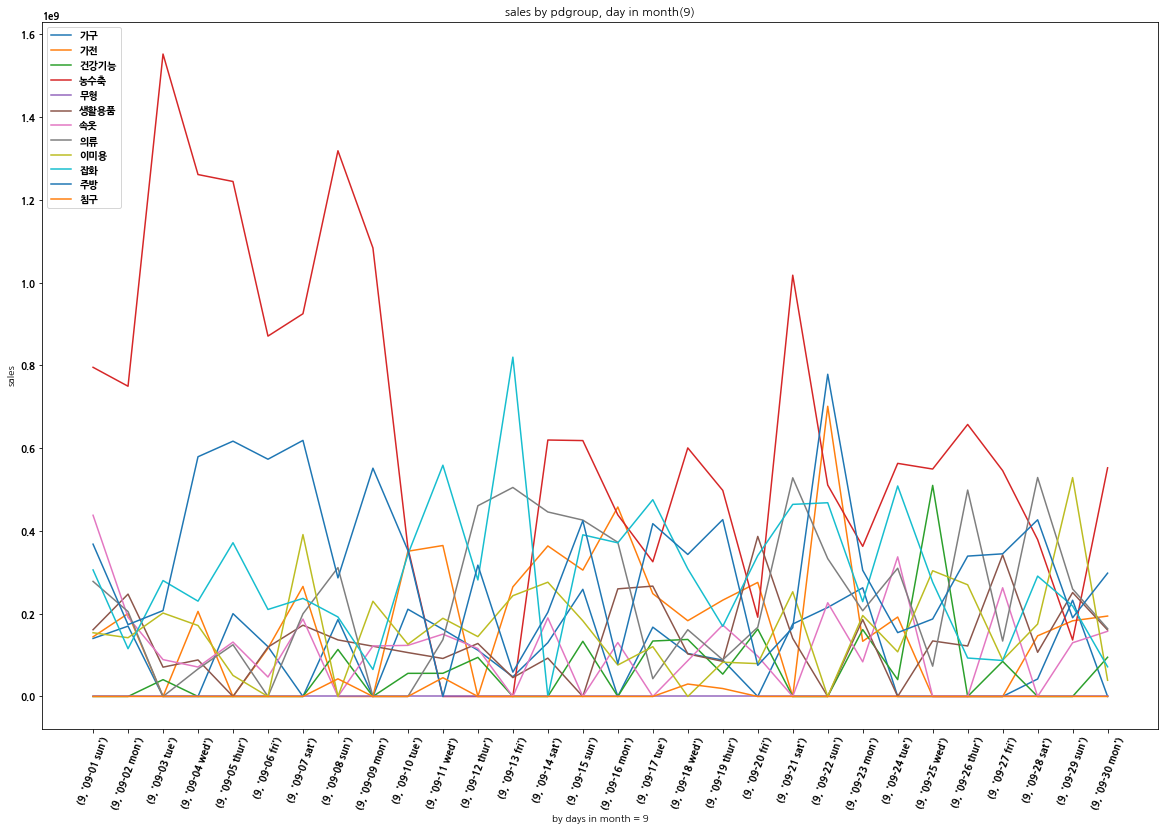

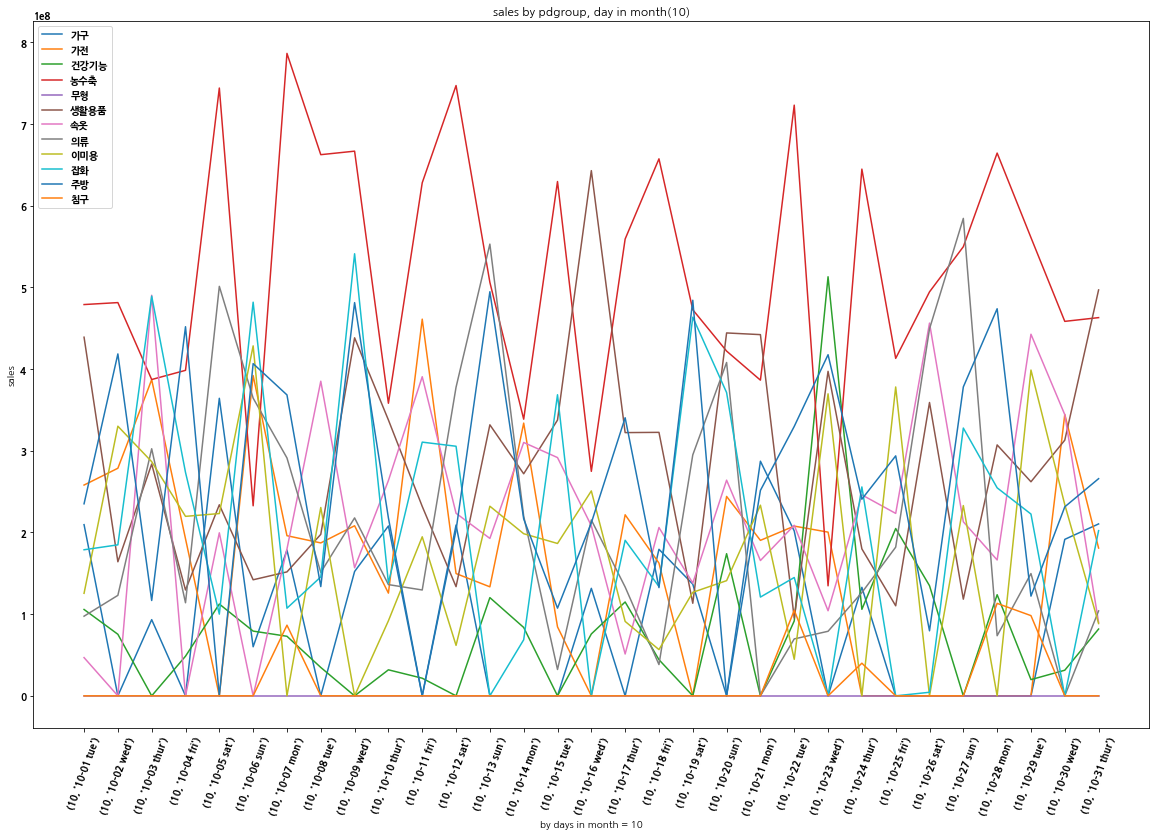

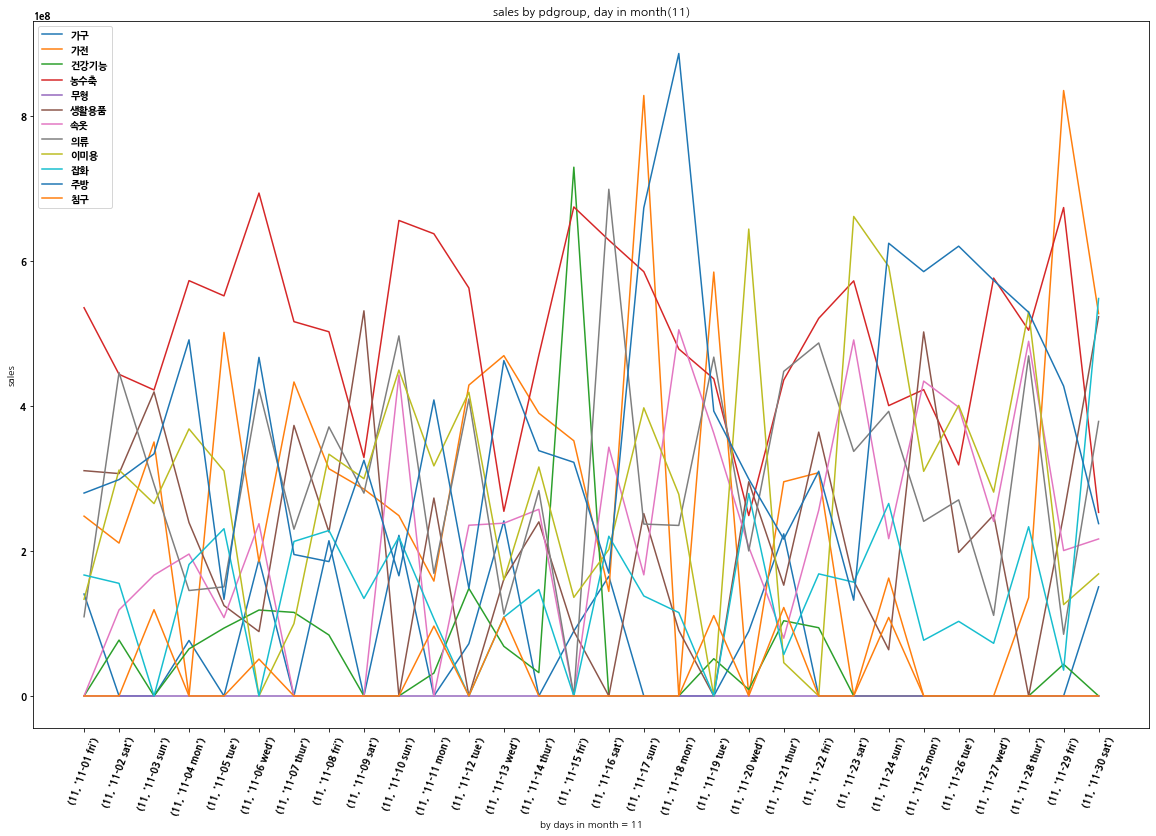

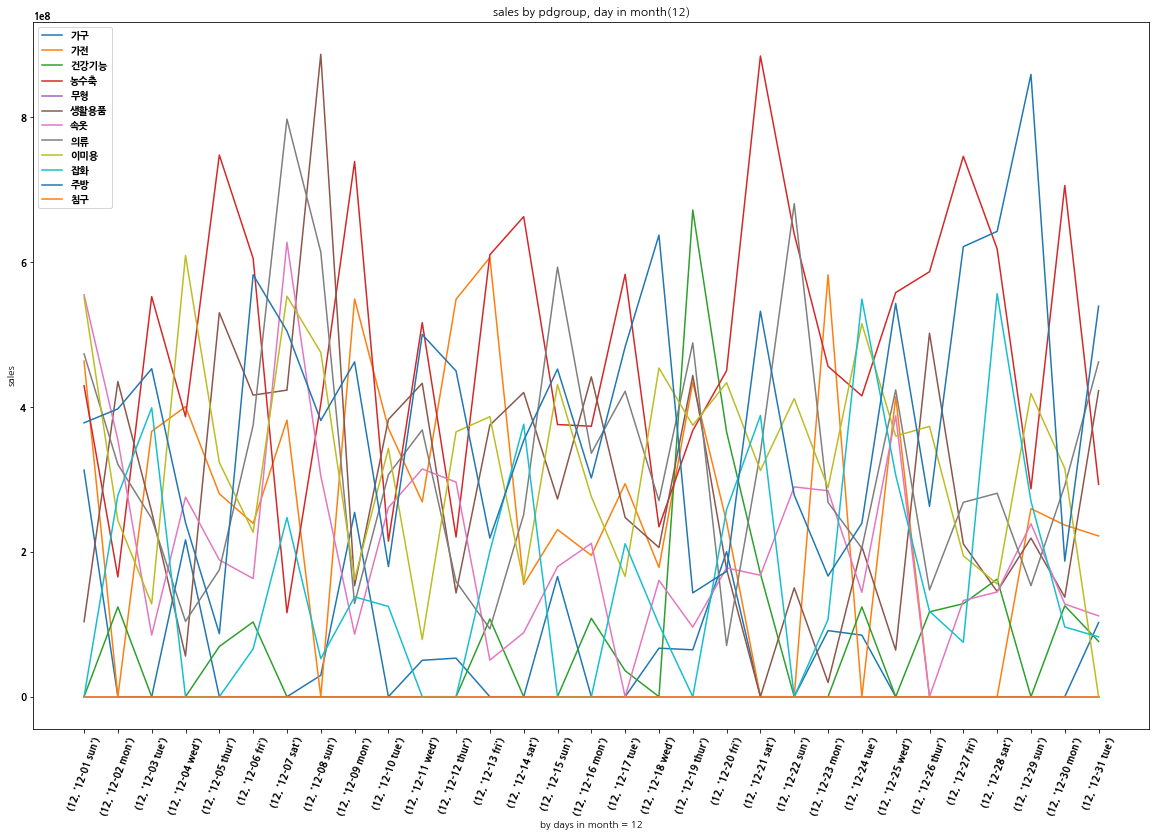

In [ ]:
# 월별 상품군별 sales (가구, 가전 등등) : 일별(2019.1.1 ~ 2020.1.1), 결측치는 0으로 처리
for mth in range(1, 12+1): 
    p_sales = sales_train[sales_train['datetime']<'2020-01-01'].pivot_table(values = 'sales', columns = ['mth', 'date_pk'], index ='pdgroup', aggfunc = 'sum')
    p_sales = p_sales.fillna(0)
    m_p_sales = p_sales.loc[:, p_sales.columns.get_level_values(0)==mth]
    ax = m_p_sales.T.plot(kind = 'line',  figsize = (20, 13))
    ax.legend(loc='upper left')
    ax.set_xticks(range(len(m_p_sales.T)))
    ax.set_xticklabels([idx for idx in m_p_sales.T.index.tolist()], rotation=70)
    plt.xlabel('by days in month = {}'.format(mth))
    plt.ylabel('sales')
    plt.title('sales by pdgroup, day in month({})'.format(mth))
    plt.savefig('viz/상품군별 sales/2019 - {}.png'.format(mth))
    plt.show()

In [ ]:
# 1) 시간대별 sales 비중
t_sales = sales_train.pivot_table(values = 'sales', columns = ['mth'], index ='hour', aggfunc = 'sum')
t_sales = t_sales.fillna(0)
t = t_sales/t_sales.sum()

cm = sns.light_palette("red", as_cmap=True)
t.style.background_gradient(cmap=cm).format('{:.2%}')

In [ ]:
# 2) 8-11, 19-23 프라임시간 sales 비중
df = pd.DataFrame(t.loc[8:11, :].sum(), columns = ['8-11 Sales Percent']).T
df = df.append(pd.DataFrame(t.loc[19:23, :].sum(), columns = ['19-23 Sales Percent']).T)
df.loc['sum (37.5% of 24h)'] = df.sum()
df.style.format("{:.2%}").highlight_max(axis=0)

In [ ]:
# 3) 16 - 18 (NS 프라임시간) sales 비중
pd.DataFrame(t.loc[16:18, :].sum(), columns = ['16-18 Sales Percent']).T.style.format("{:.2%}")

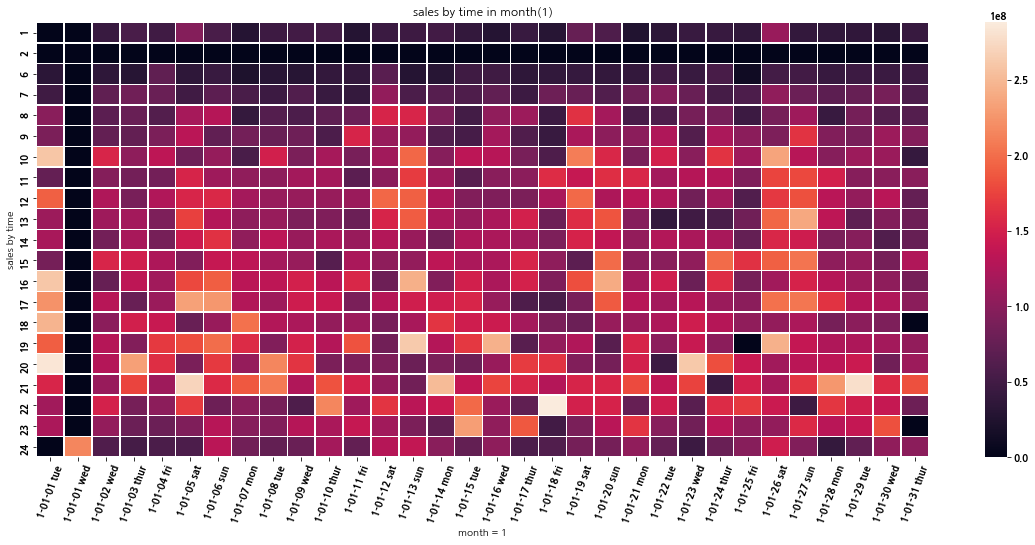

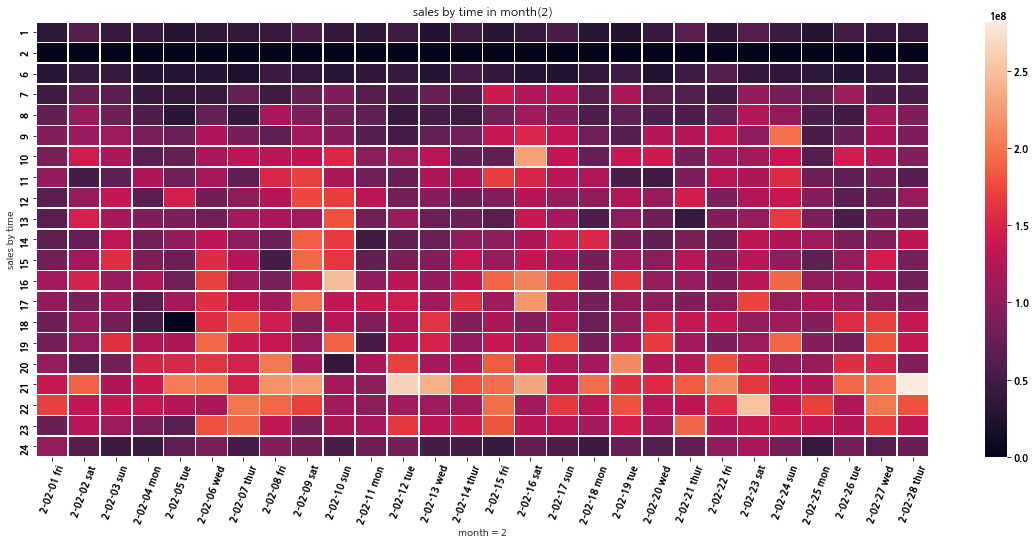

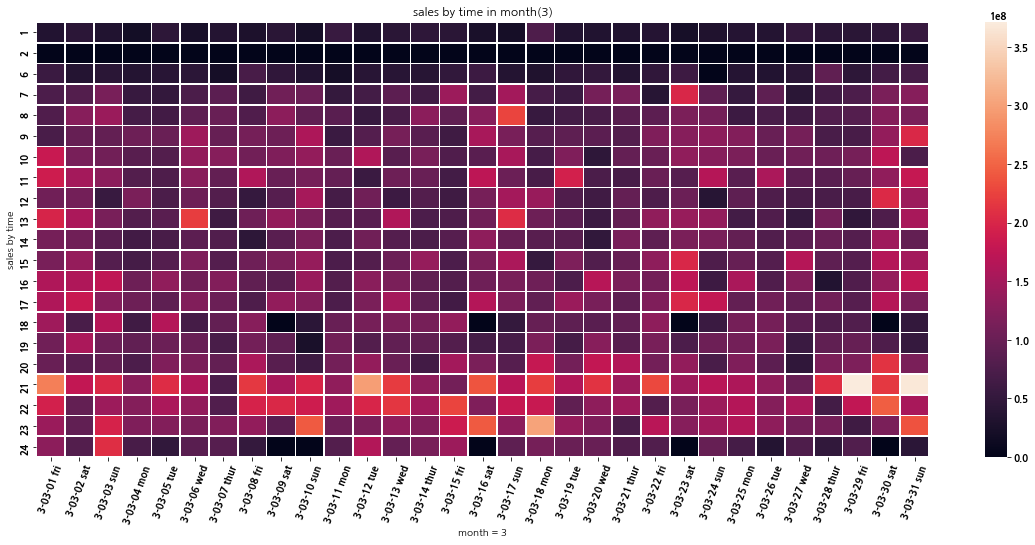

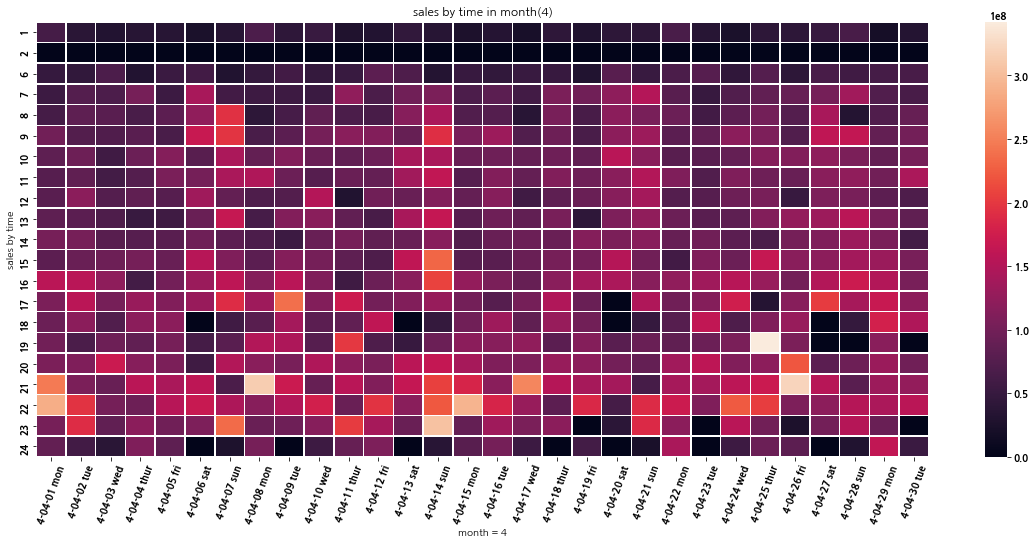

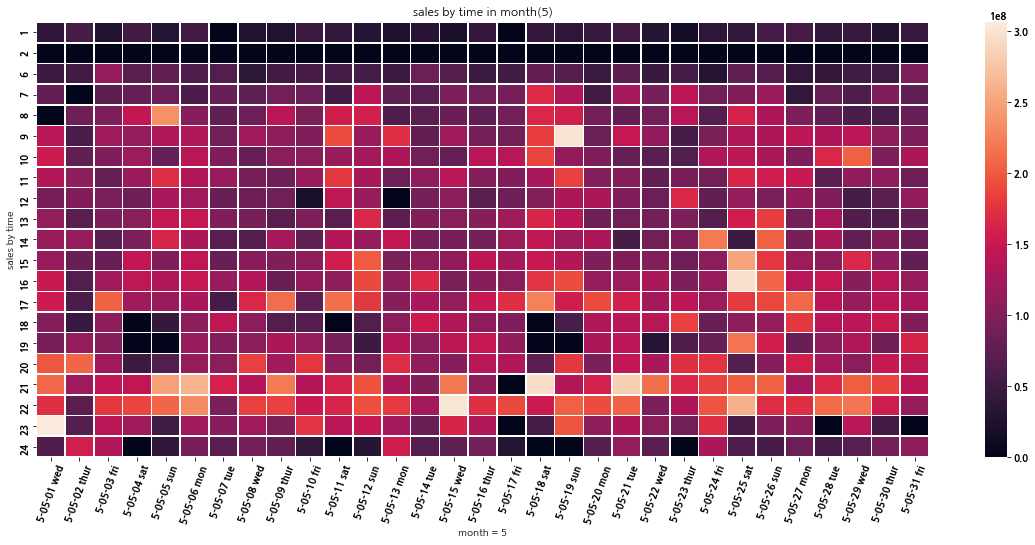

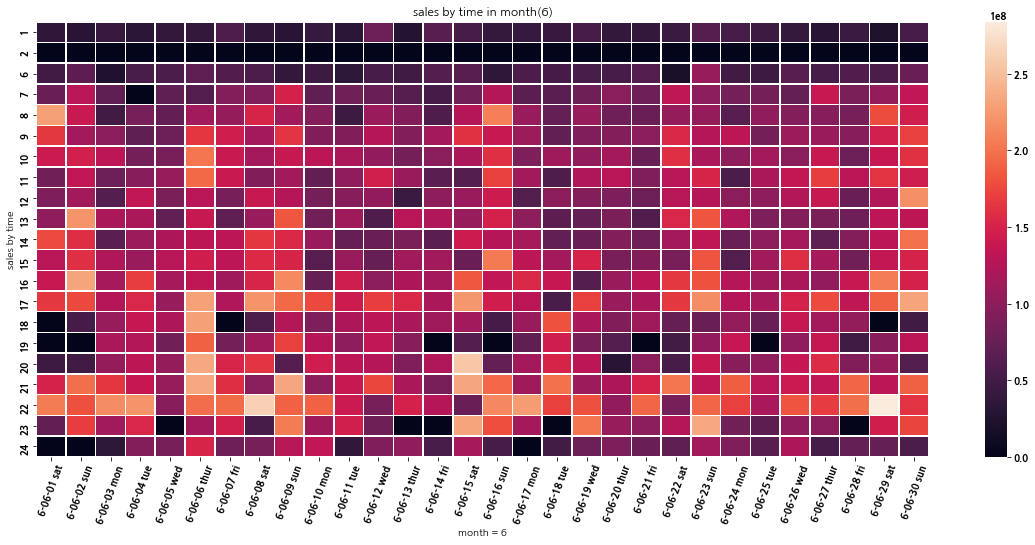

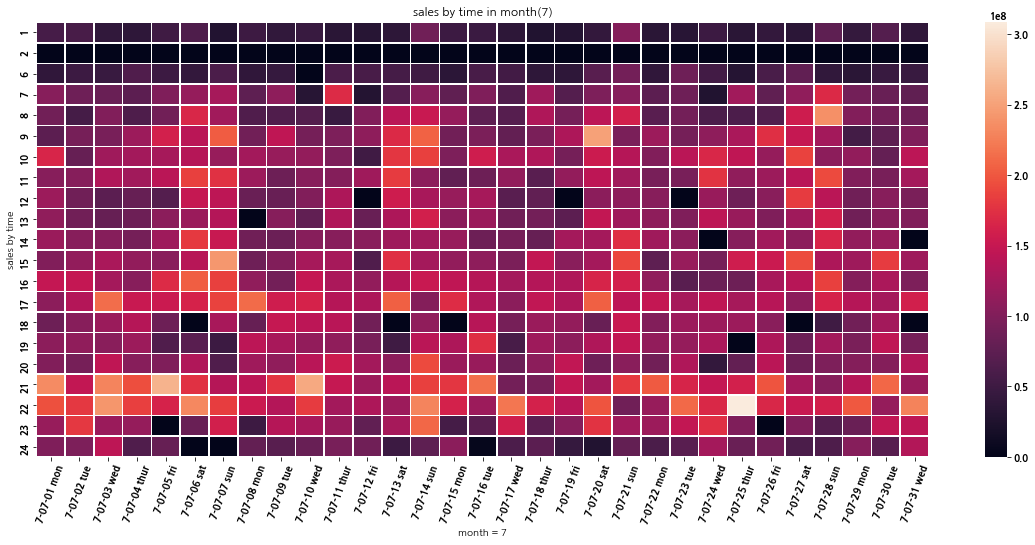

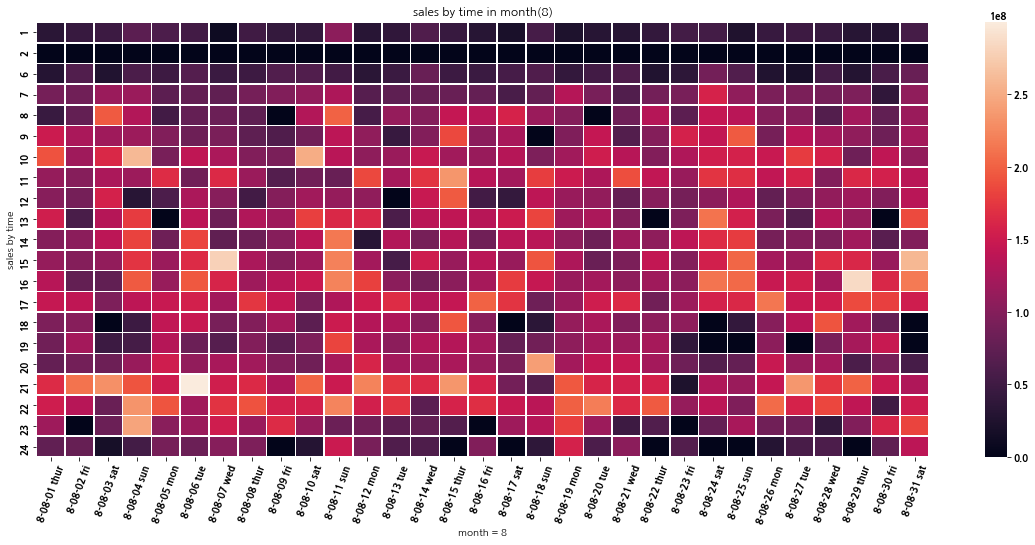

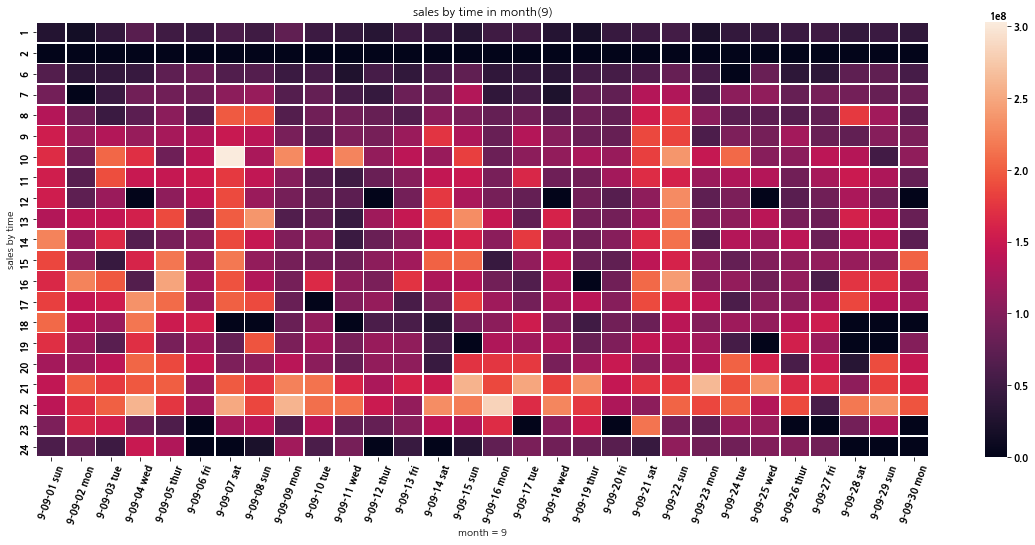

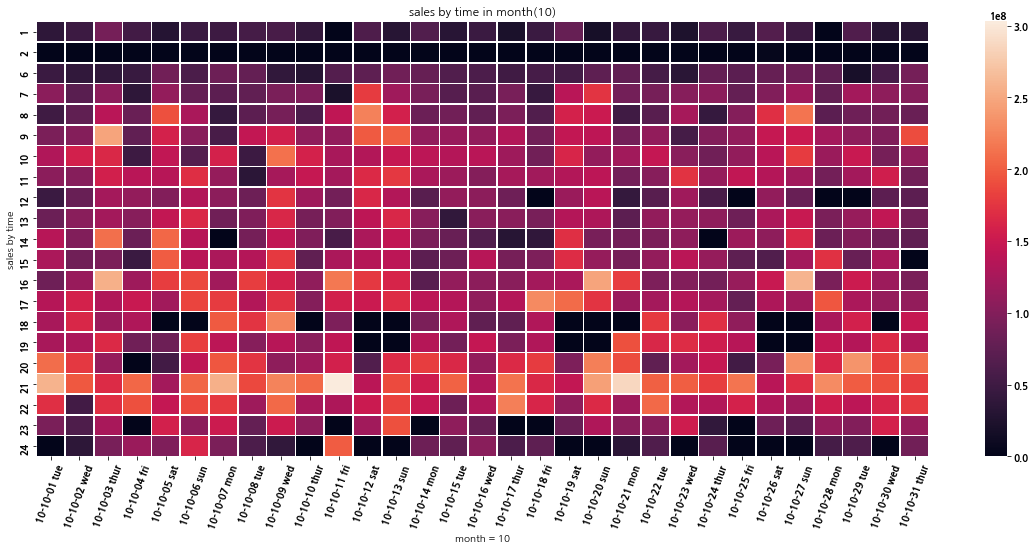

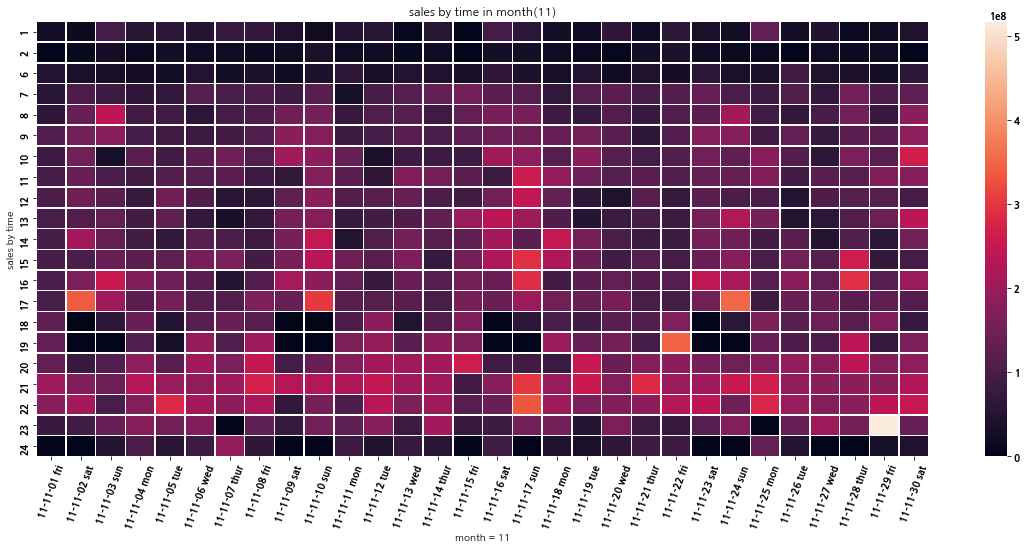

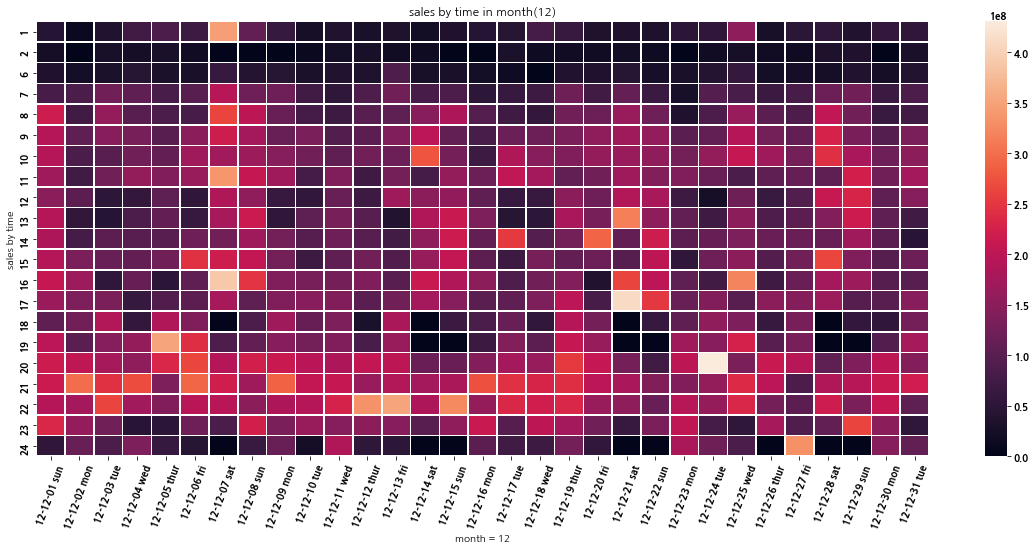

In [ ]:
# 일별 시간대별 sales (19.1.1 ~ 20.1.1) : 특정시간 단위 (00 ~ 24시, 결측치는 0으로 처리)
for mth in range(1, 12+1): 
    t_sales = sales_train.pivot_table(values = 'sales', columns = ['mth','date_pk'], index ='hour', aggfunc = 'sum')
    t_sales = t_sales.fillna(0)
    m_t_sales = t_sales.loc[:,t_sales.columns.get_level_values(0)==mth]
    
    plt.figure(figsize = (20, 8))
    sns.heatmap(m_t_sales, linewidths=.5)
    plt.xticks(rotation= 70)
    plt.xlabel('month = {}'.format(mth))
    plt.ylabel('sales by time')
    plt.title('sales by time in month({})'.format(mth))
    #plt.savefig('2020 - {}.png'.format(mth), dpi = 500)
    plt.show()

In [ ]:
sales_train.columns

Index(['datetime', 'duration', 'mthcode', 'pdcode', 'pdname', 'pdgroup',
       'unitp', 'sales', 'mth', 'day', 'hour', 'minute', 'date', 'wday',
       'hday', 'date_pk', 'pd_pk'],
      dtype='object')

<AxesSubplot:xlabel='mth-date_pk', ylabel='hour-pdgroup'>

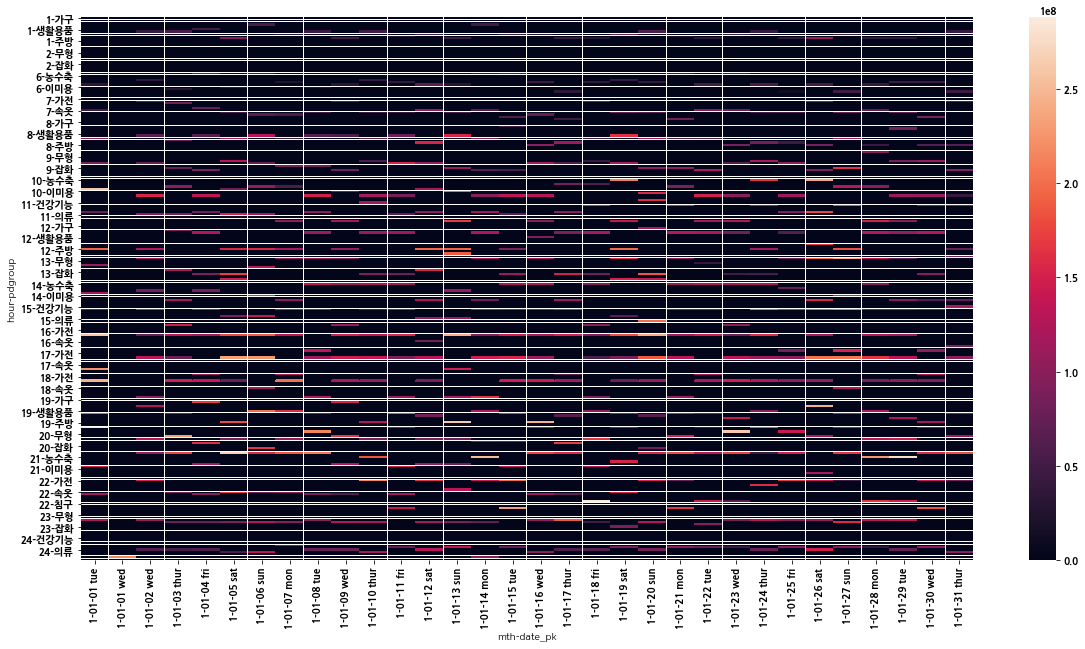

In [ ]:
p_sales = sales_train.pivot_table(values = 'sales', columns = ['mth', 'date_pk'], index =['hour', 'pdgroup'], aggfunc = 'sum') # date_pk
p_sales = p_sales.fillna(0)
m_p_sales = p_sales.loc[:, p_sales.columns.get_level_values(0)==1]
plt.figure(figsize= (20,10))
sns.heatmap(m_p_sales, linewidths=.001)


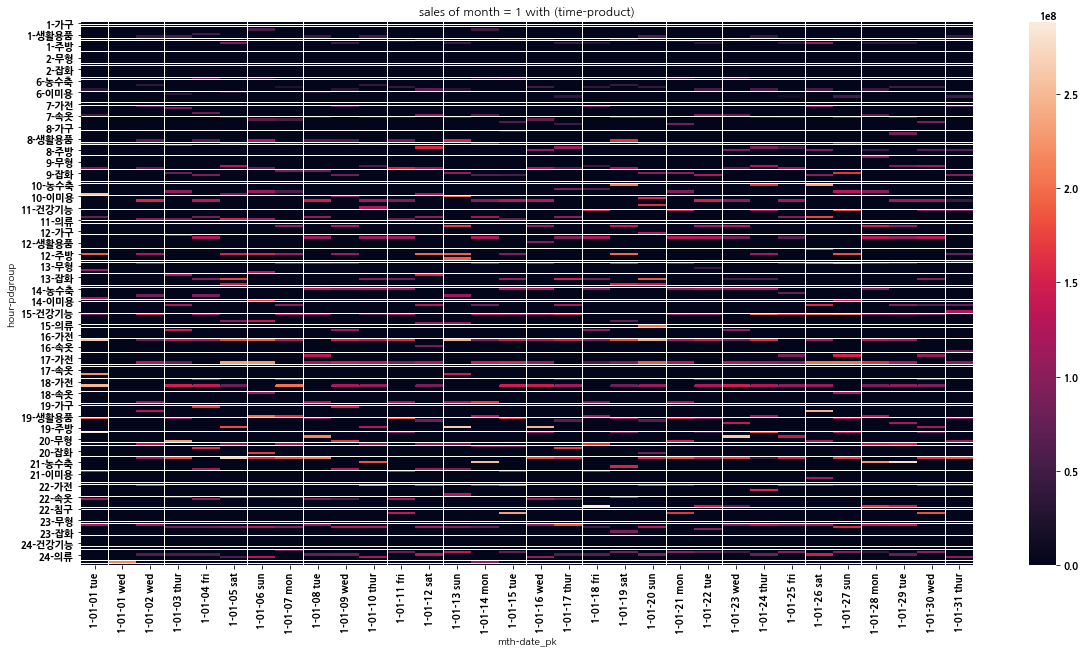

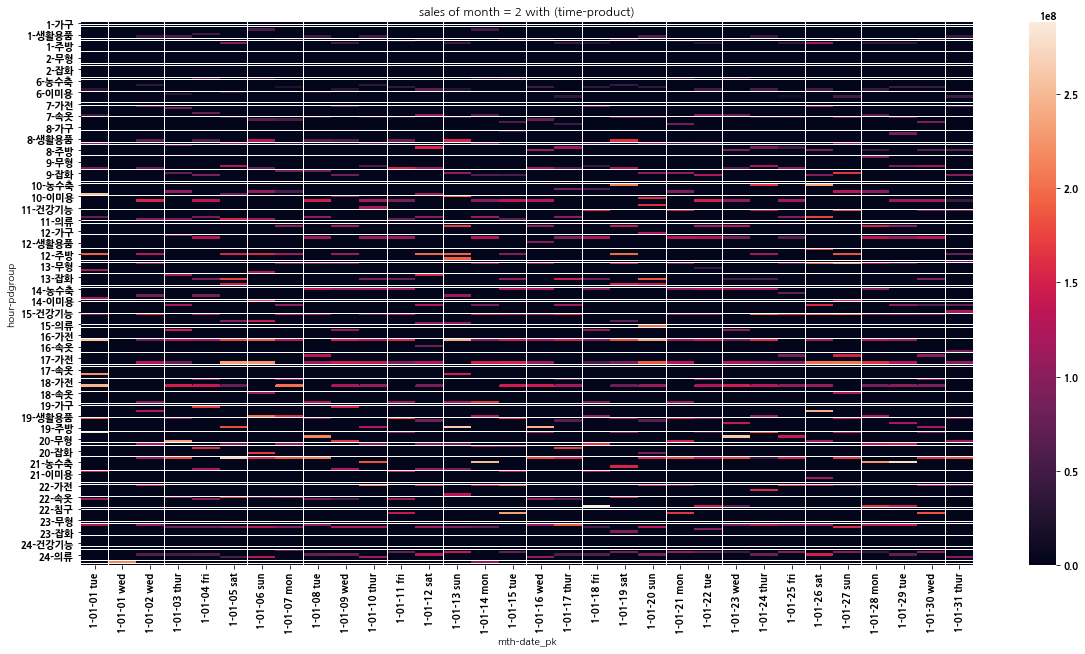

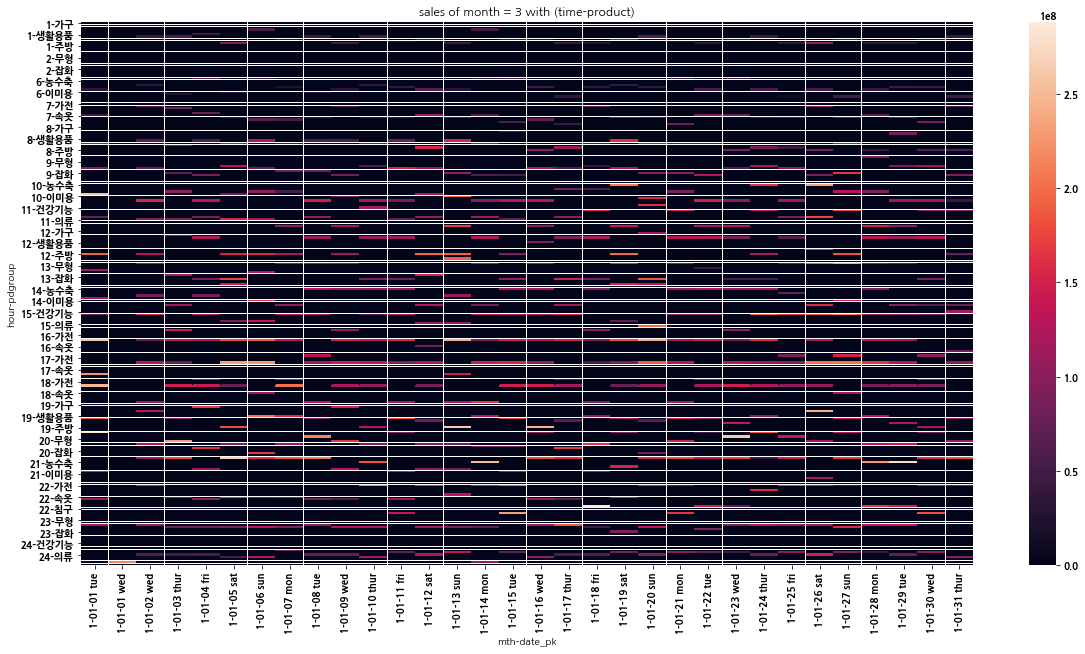

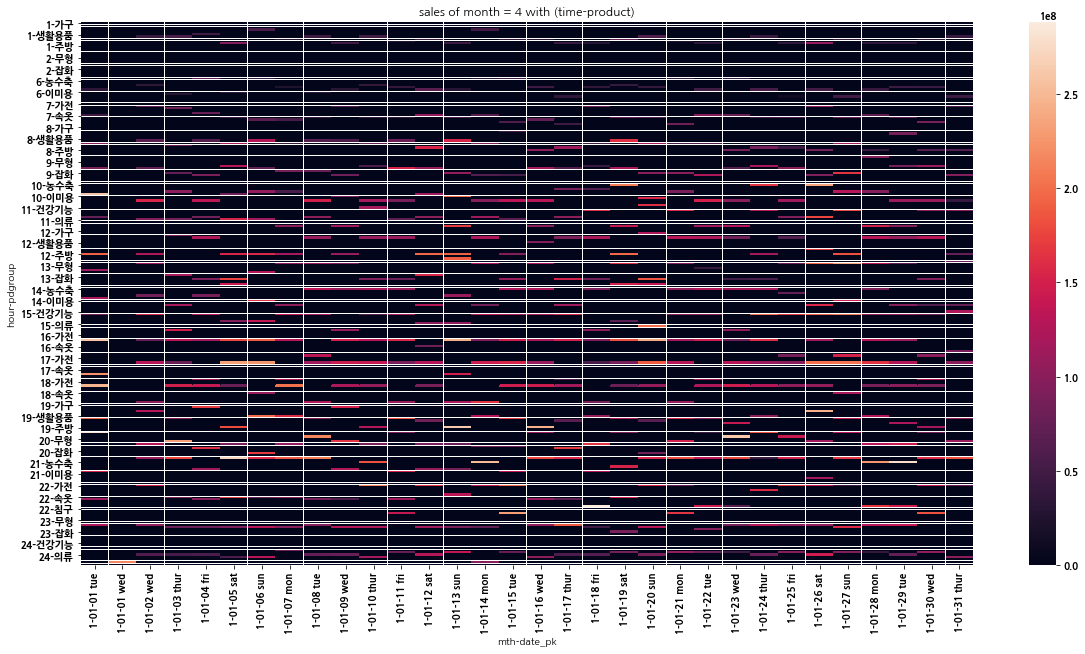

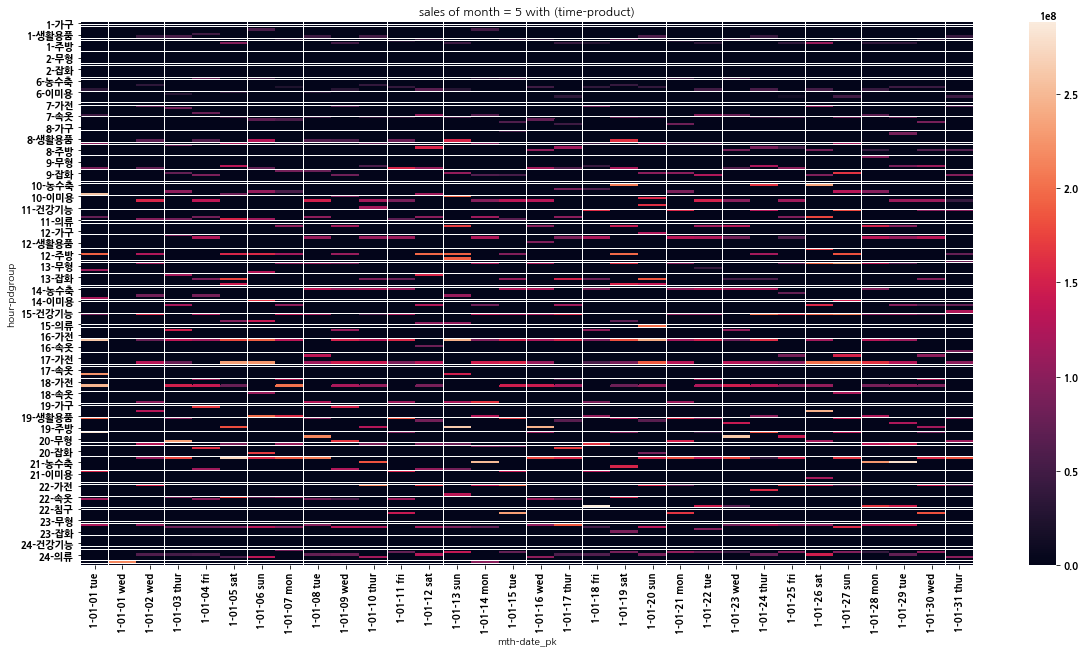

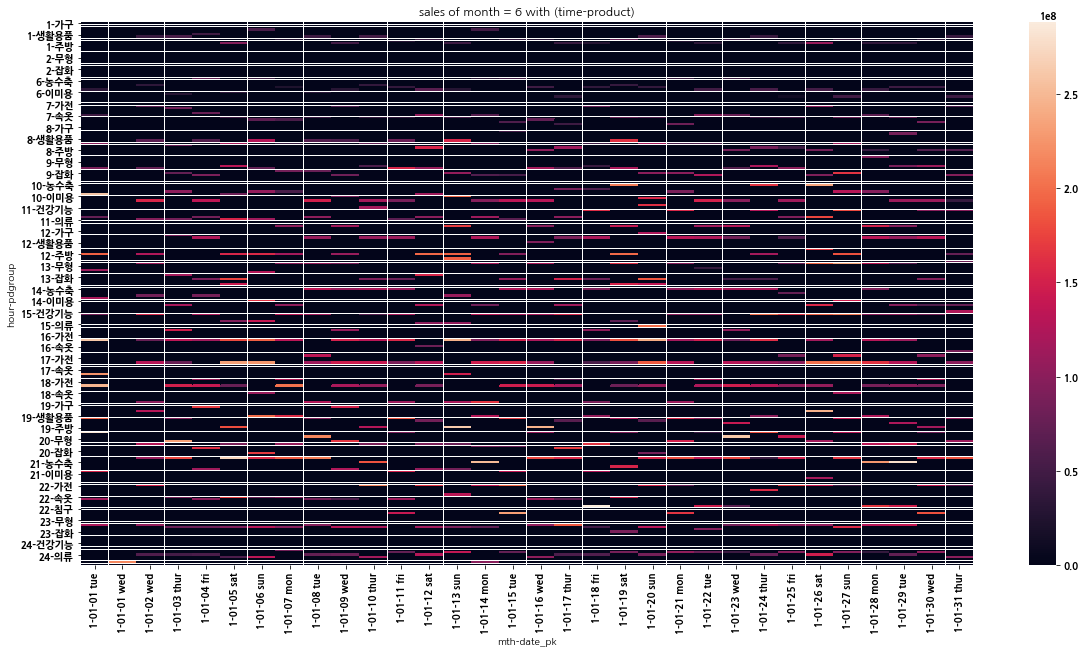

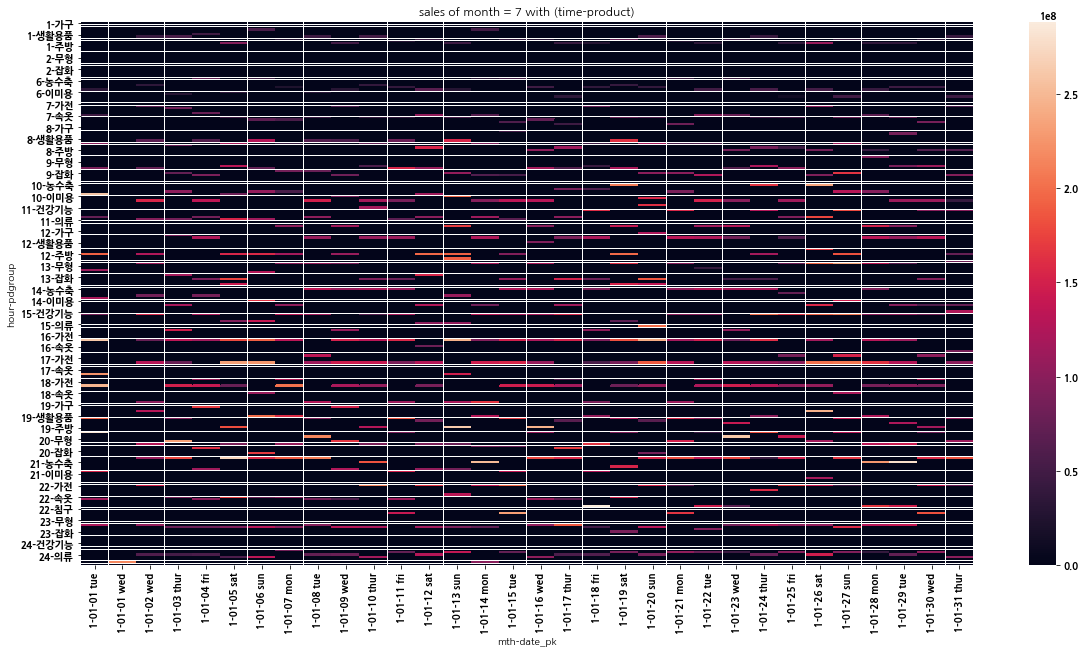

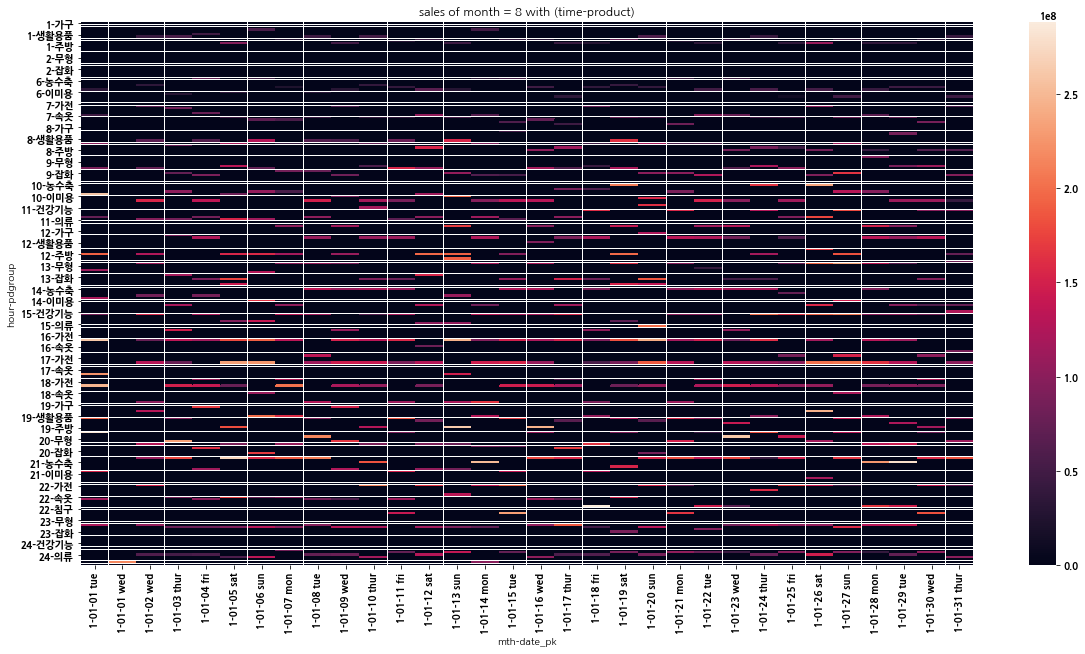

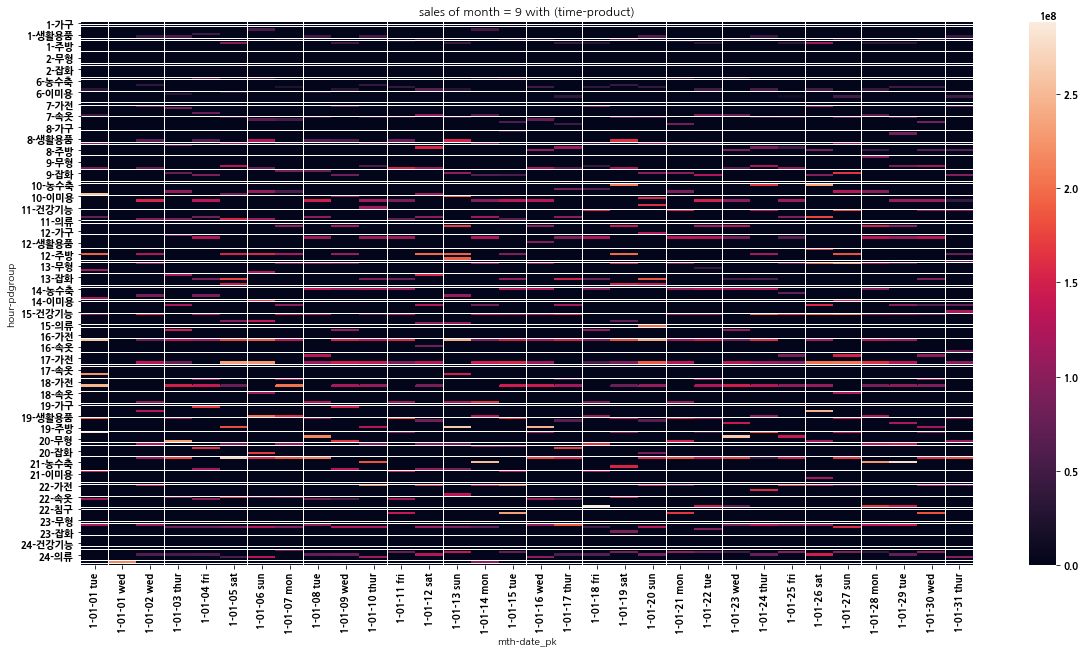

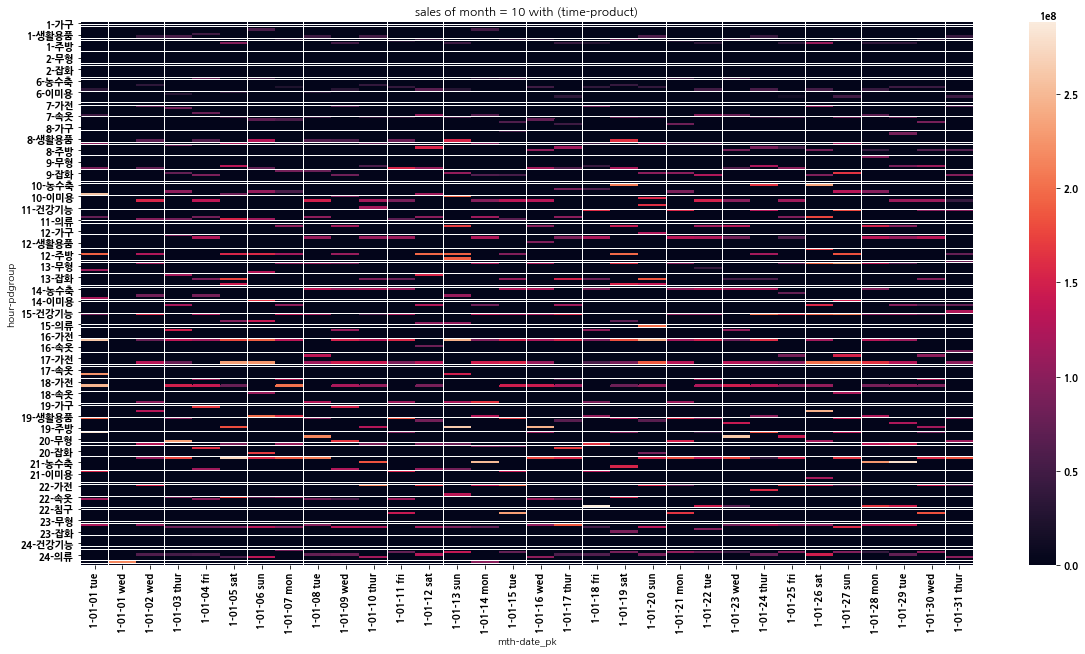

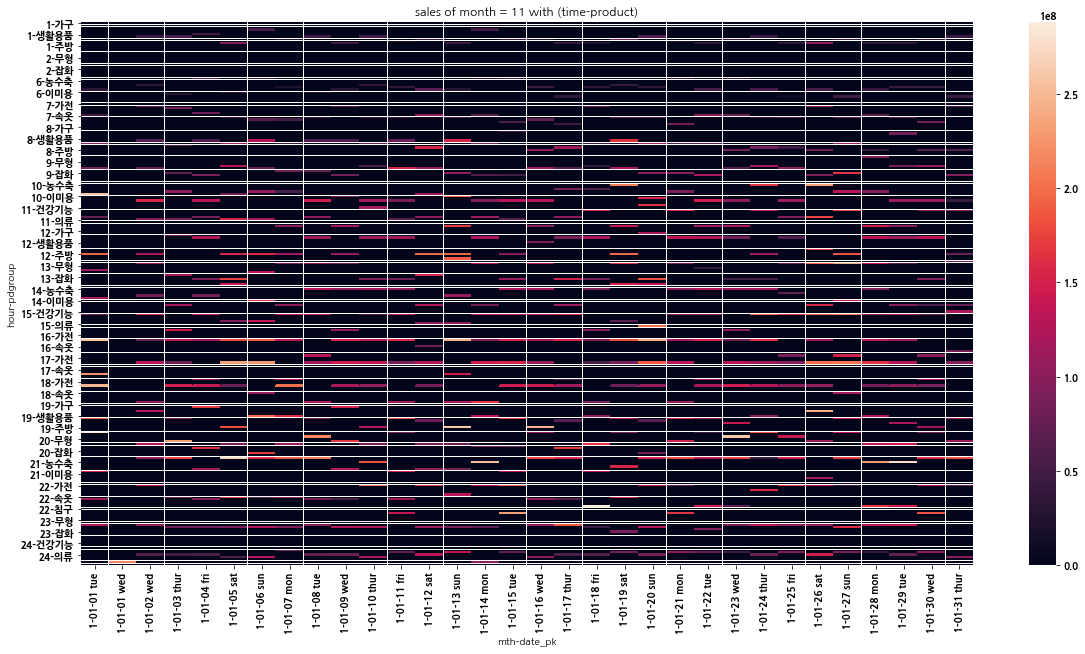

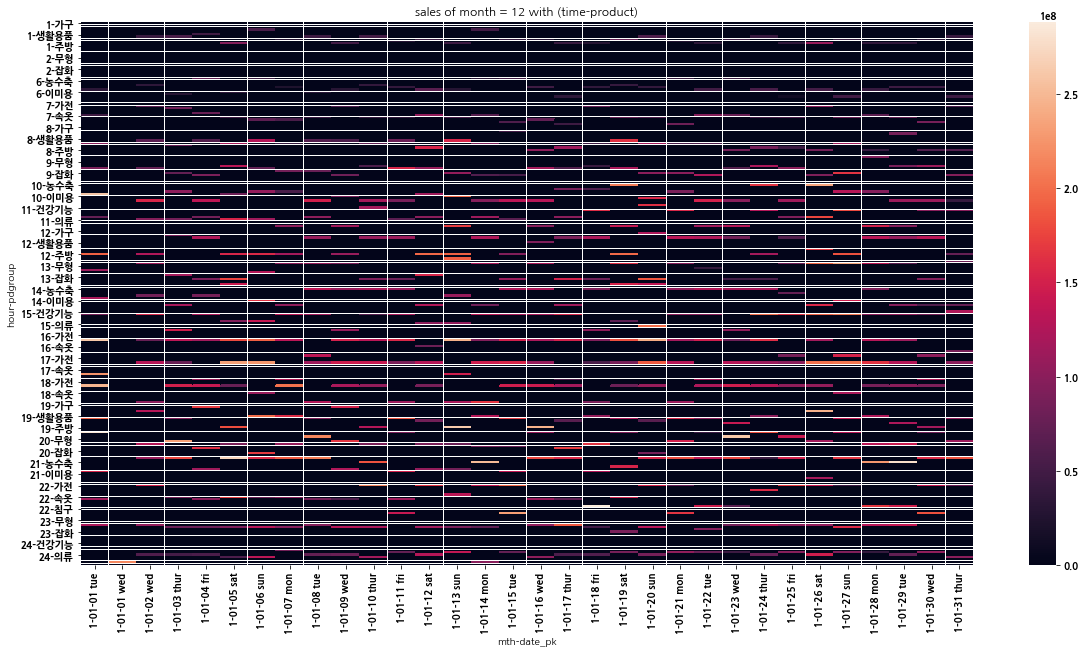

In [ ]:
# 시간대, 상품군 별 매출이 높은 상품들 확인
for mth in range(1, 13):
    p_sales = sales_train.pivot_table(values = 'sales', columns = ['mth', 'date_pk'], index =['hour', 'pdgroup'], aggfunc = 'sum') # date_pk
    p_sales = p_sales.fillna(0)
    m_p_sales = p_sales.loc[:, p_sales.columns.get_level_values(0)==1]
    plt.figure(figsize= (20,10))
    plt.title('sales of month = {} with (time-product)'.format(mth))
    sns.heatmap(m_p_sales, linewidths=.001)